Unmapped hg19 reads, aligned to viruses, merged together, "samtools depth", ignoring any regions where a portion of hg19 aligned to the virus reference.

Shrunken human regions by 2000



Dissatisfied with the previous run, I expanded the hg19 alignment regions by 2000bp and replot.

Below are plots of coverage depth for each virus in the defined nonhg19 regions.

There are still a couple spikes, but compared to the 20190128 run, much fewer.






In [1]:
import pandas
import matplotlib.pyplot as plt
import glob
import os.path

In [2]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [3]:
virii=pandas.read_csv('/Users/jakewendt/20181214-1000genomes-unmapped-virii/virii_details.csv', sep="\t", header=None, 
                      names=["accession","description"],
                      index_col=["accession"])
virii.head()

,description
accession,
AB513134.1,"Human T-lymphotropic virus 1 proviral DNA, com..."
AB618031.1,"Herpes simplex virus (type 1 /strain RH2) DNA,..."
AF037218.1,"Human herpesvirus 7 strain RK, complete genome"
AF148805.2,"Human herpesvirus 8 strain GK18, complete genome"
AP015015.1,"Human herpesvirus 4 DNA, complete genome, stra..."


AB513134.1
Human T-lymphotropic virus 1 proviral DNA, complete genome, isolate: B1033-2009


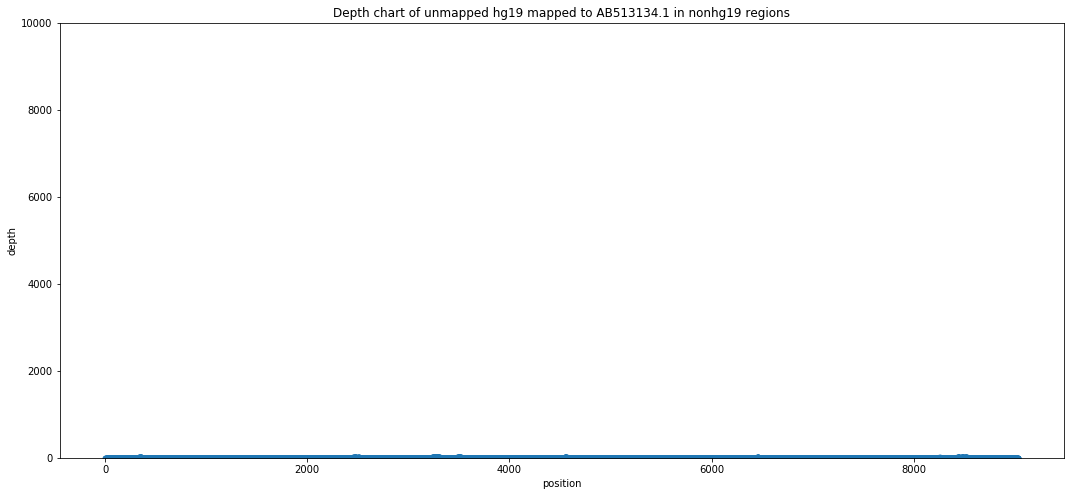

AB618031.1
Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome


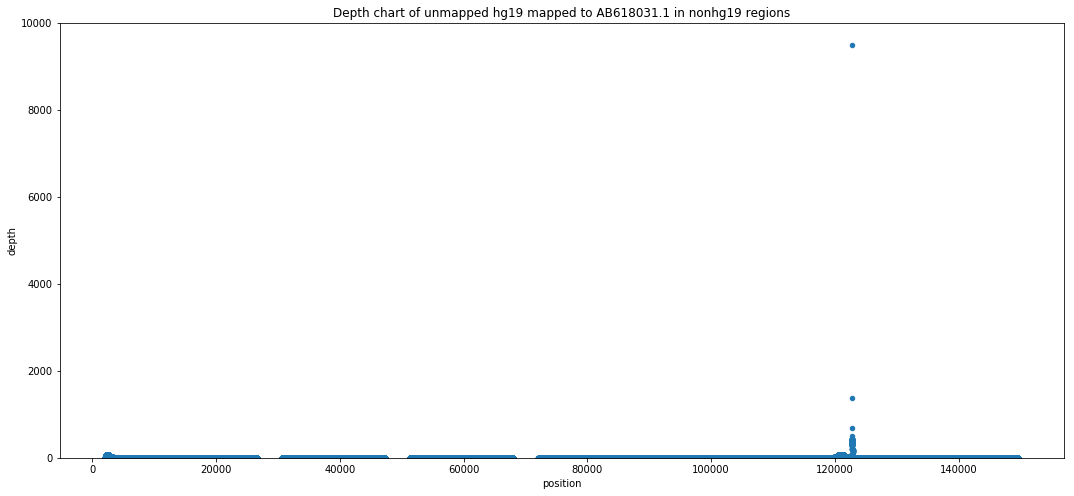

AF037218.1
Human herpesvirus 7 strain RK, complete genome


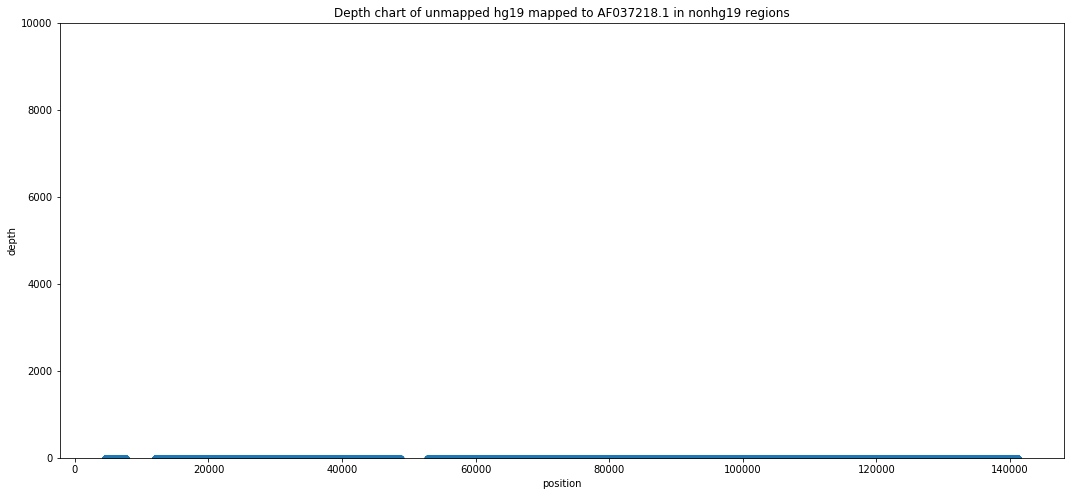

AF148805.2
Human herpesvirus 8 strain GK18, complete genome


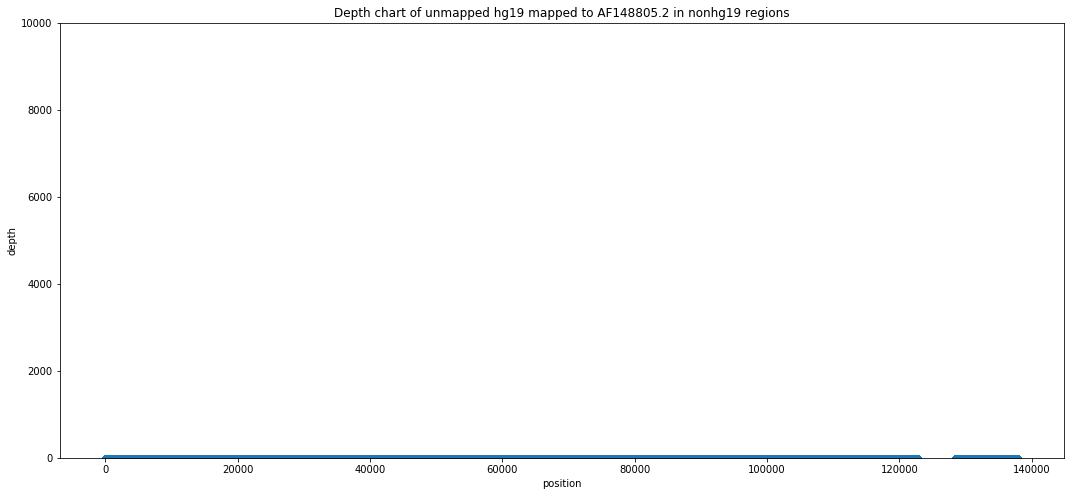

AP015015.1
Human herpesvirus 4 DNA, complete genome, strain: SNU-719


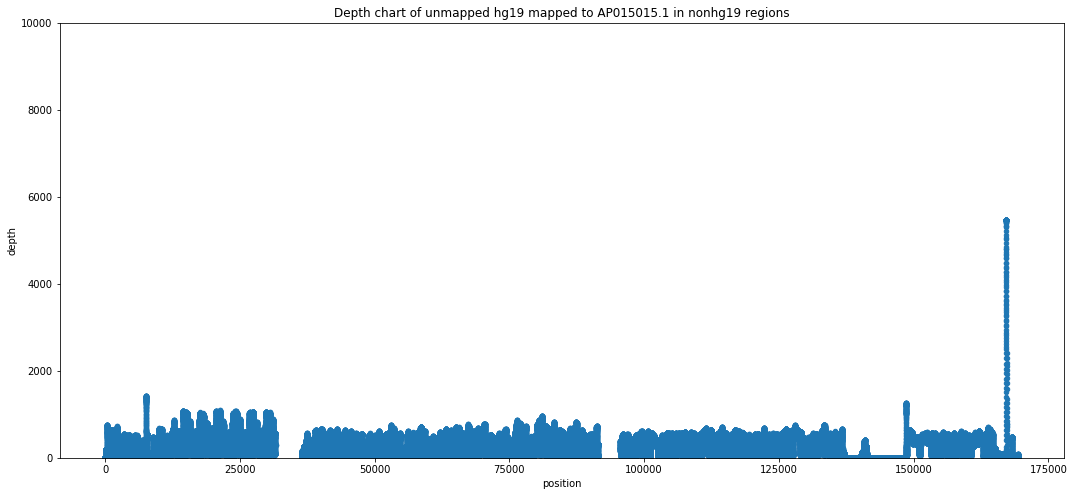

AP015016.1
Human herpesvirus 4 DNA, complete genome, strain: YCCEL1


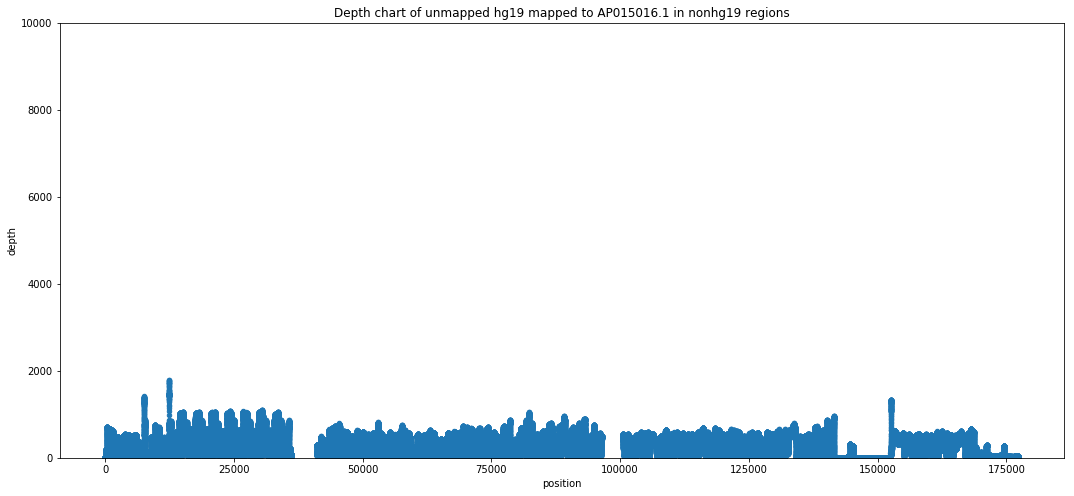

AP017458.1
Human herpesvirus 8 DNA, complete genome, strain: SPEL


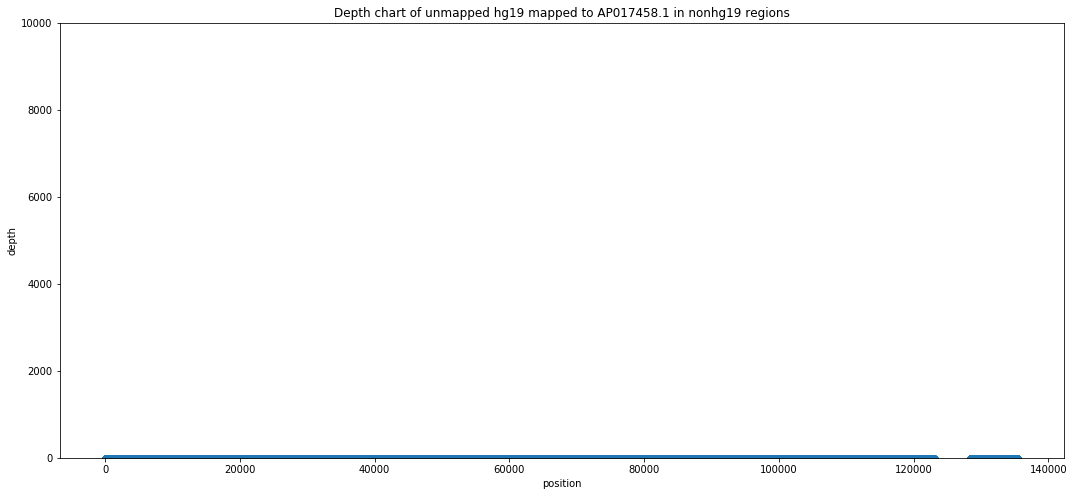

AY352275.1
HIV-1 isolate SF33 from USA, complete genome


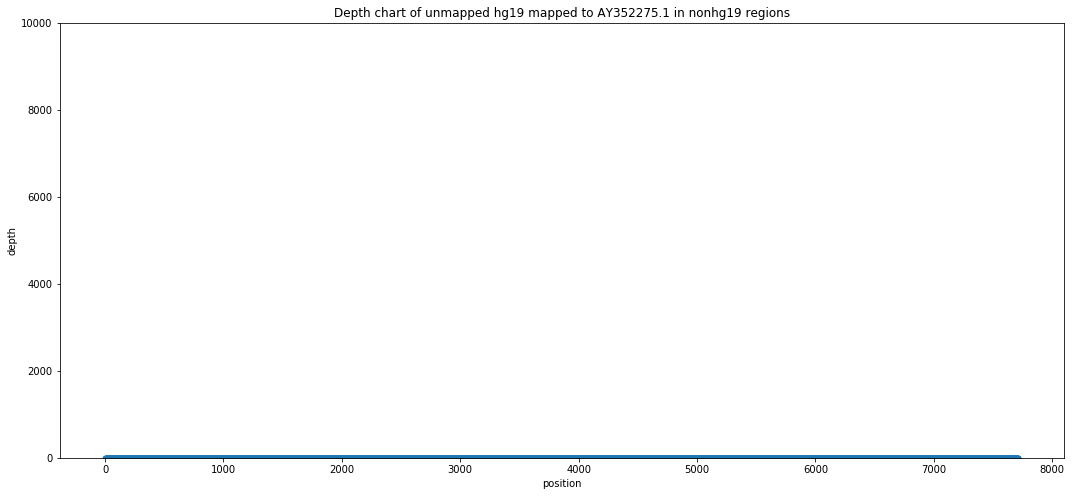

AY446894.2
Human herpesvirus 5 strain Merlin, complete genome


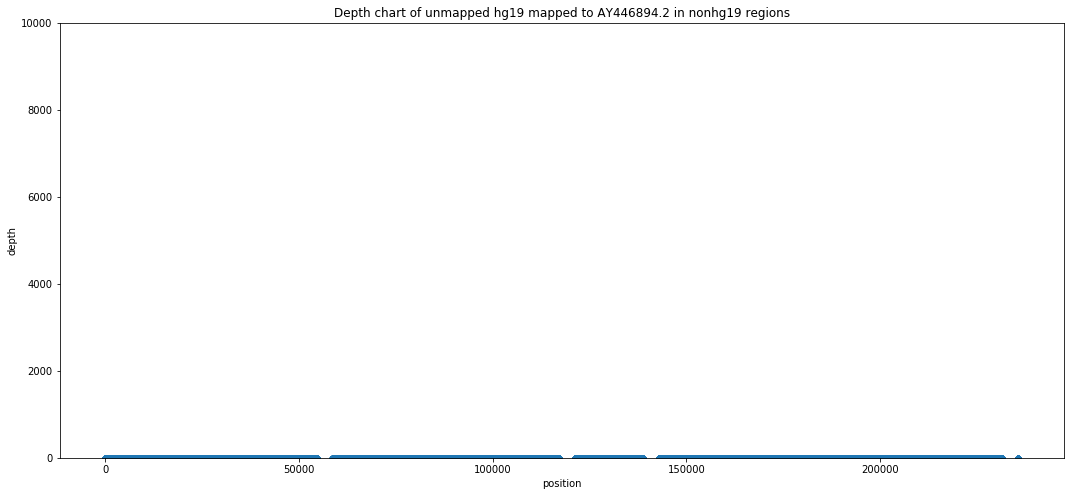

D13784.1
Human T-lymphotropic virus 1 proviral DNA, complete genome


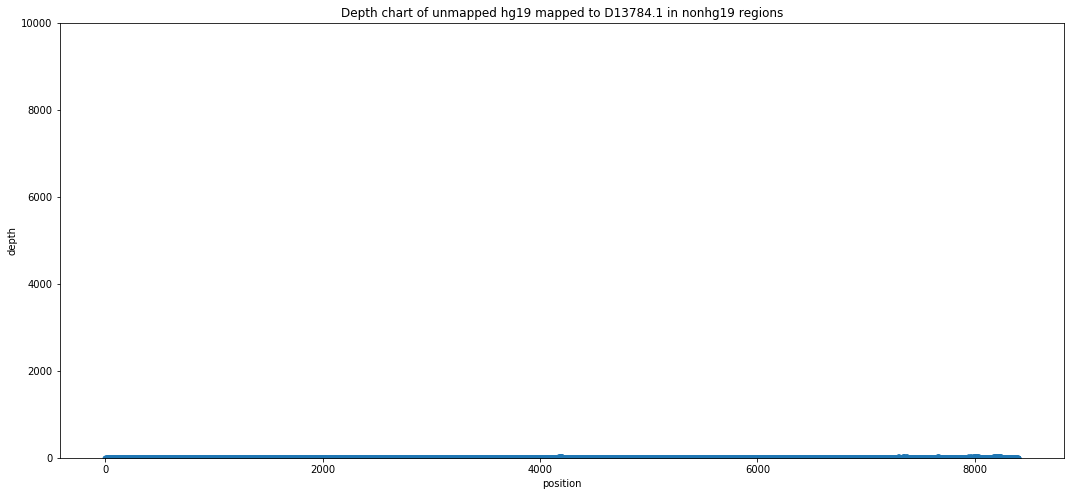

D26561.1
Human papillomavirus type 5b proviral genes for L1 protein, E6 protein, E7 protein, E1 protein, partial and complete cds


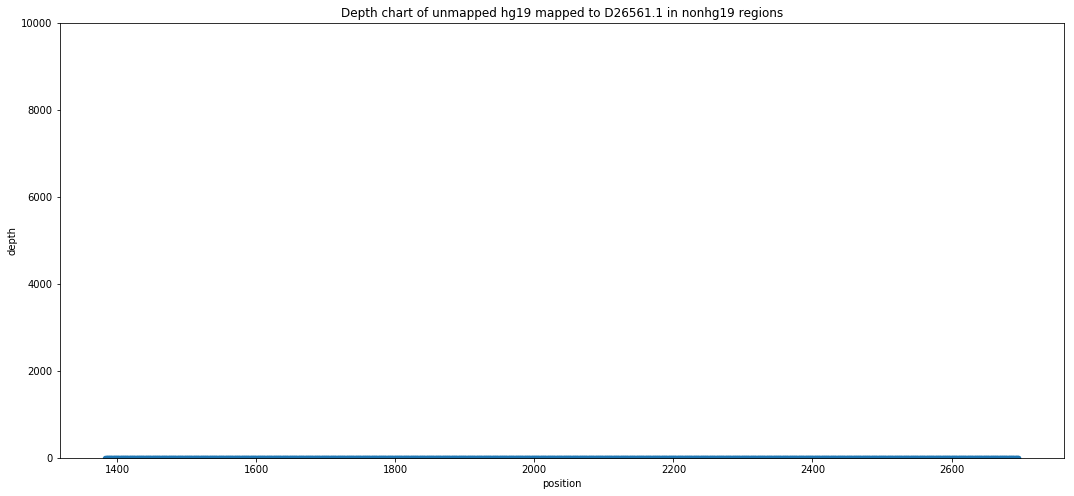

DQ093792.1
Human T-lymphotropic virus 3 strain 2026ND, complete genome


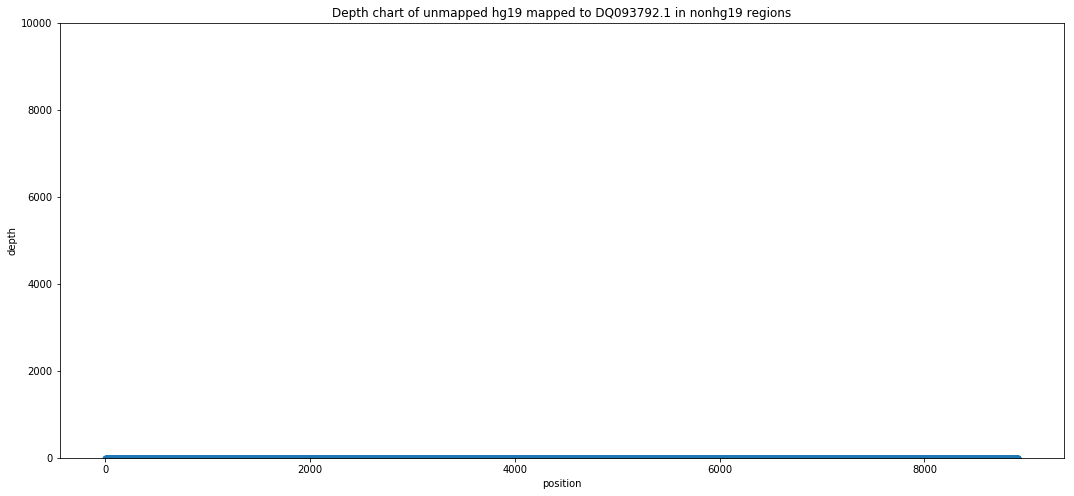

DQ462191.1
Human T-lymphotropic virus 3 strain Pyl 43, complete genome


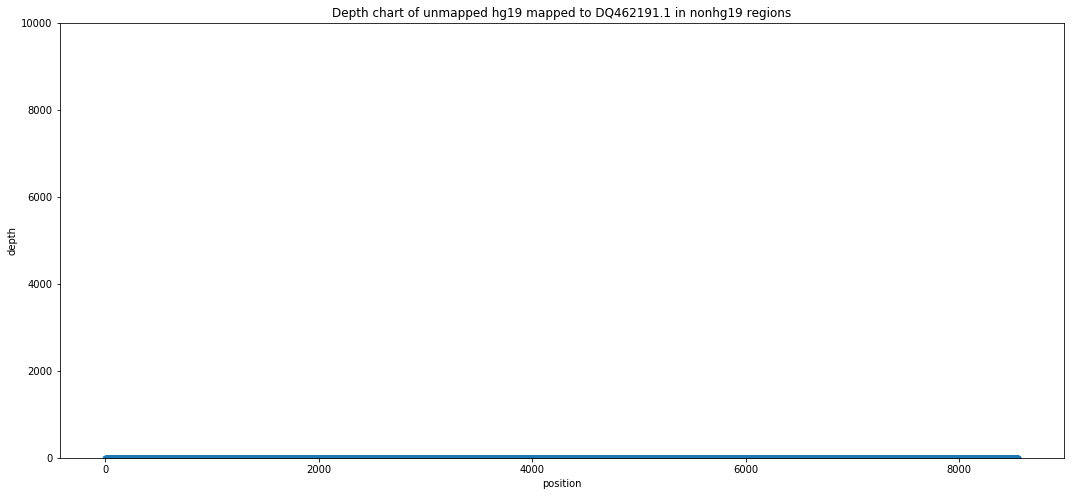

EF488483.1
Human T-lymphotropic virus 4 strain 1863LE, complete genome


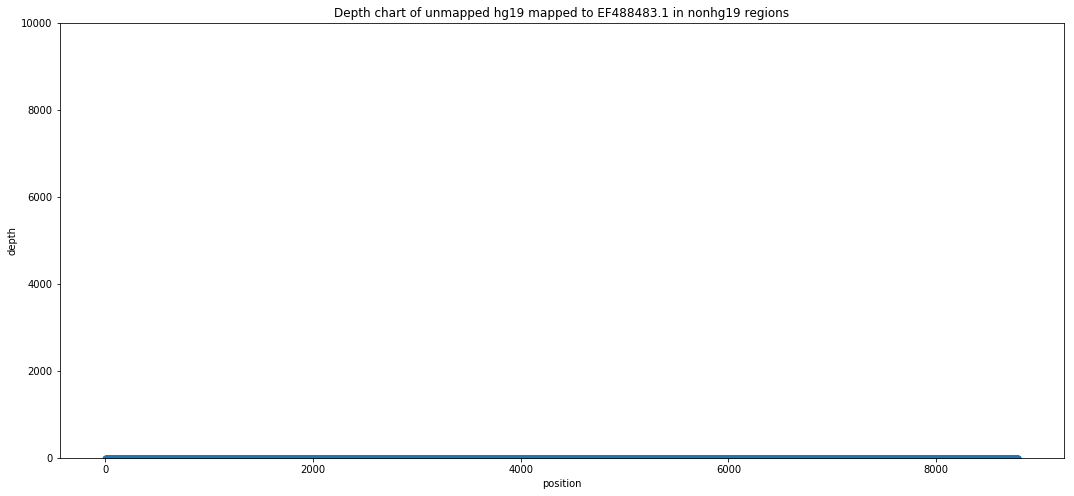

EF999921.1
Human herpesvirus 5 strain TB40/E clone TB40-BAC4, complete sequence


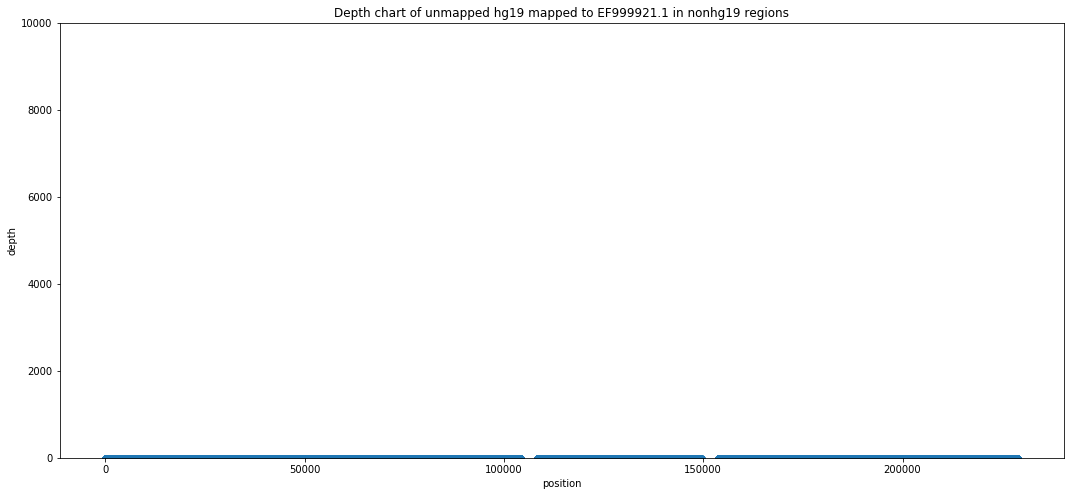

EU649782.1
Human T-lymphotropic virus 3 strain Lobak18, complete genome


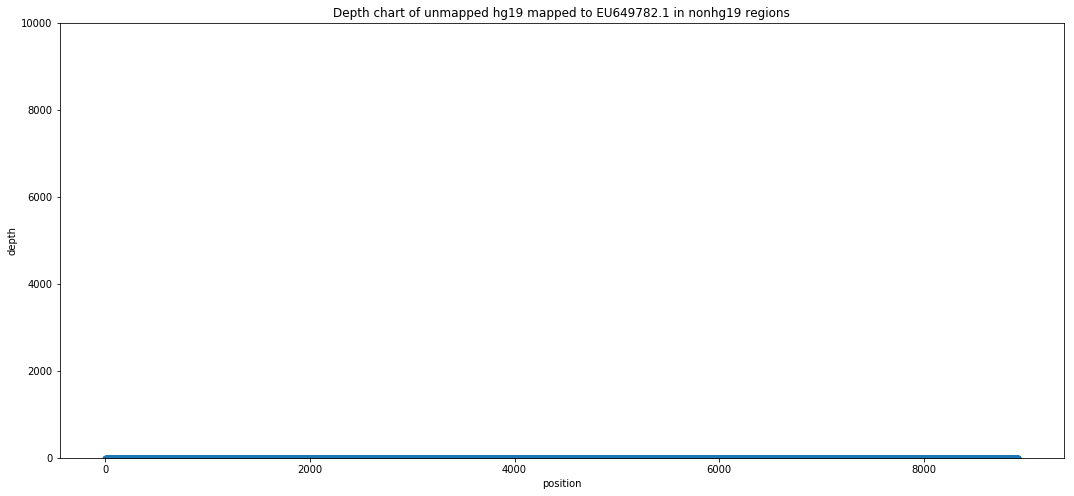

FJ527563.1
Human herpesvirus 5 strain AD169, complete genome


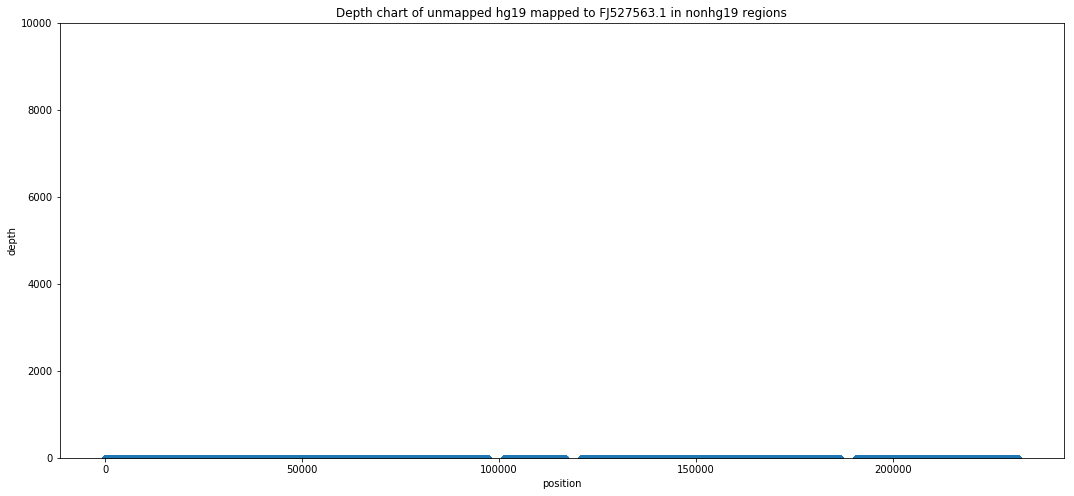

GQ221974.1
Human herpesvirus 5 strain 3157, complete genome


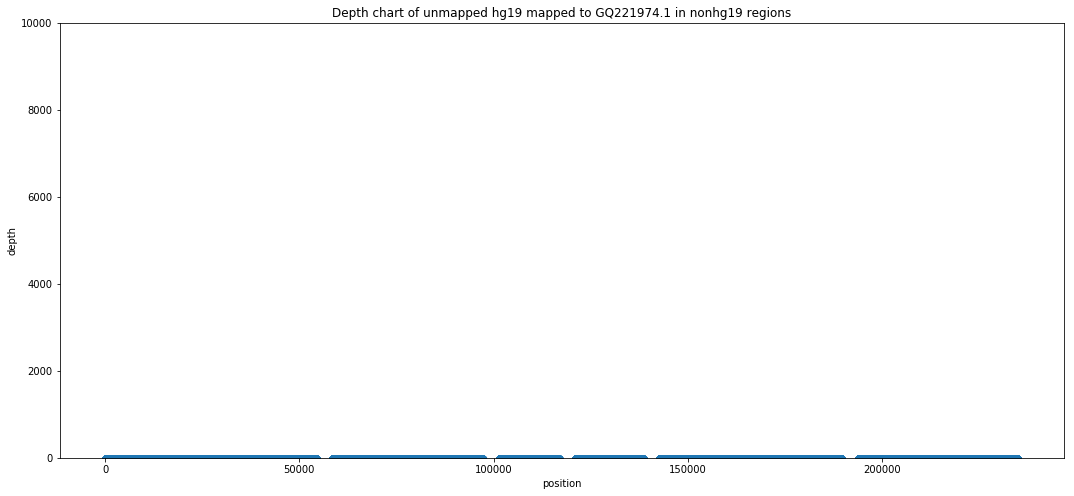

GQ396662.1
Human herpesvirus 5 strain HAN38, complete genome


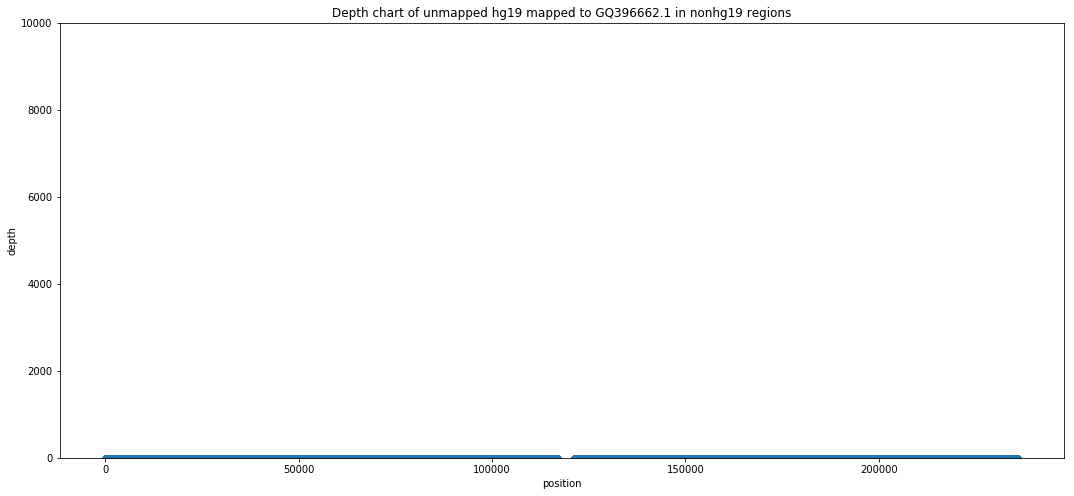

GQ994935.1
Human herpesvirus 8 strain JSC-1 clone BAC16, complete genome


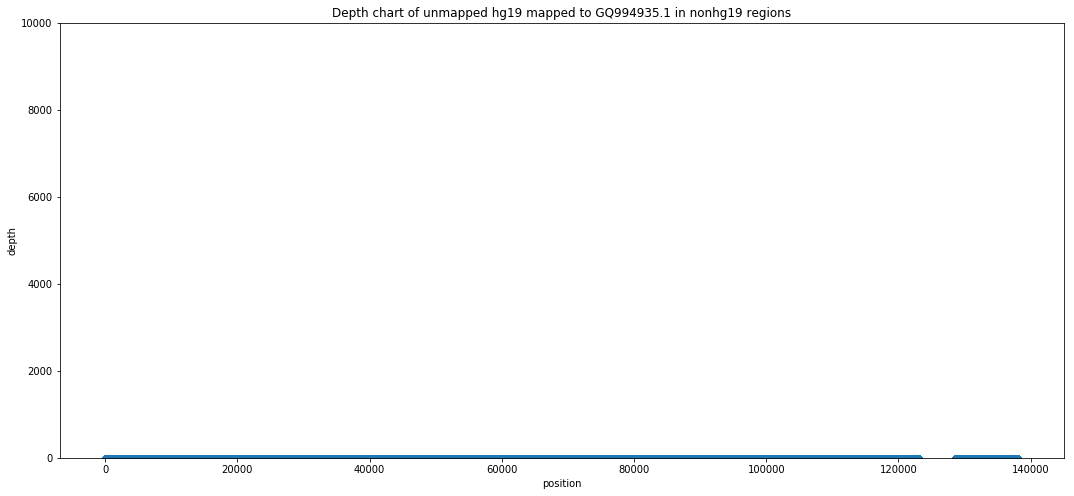

GU937742.2
Human herpesvirus 5 strain Toledo, complete genome


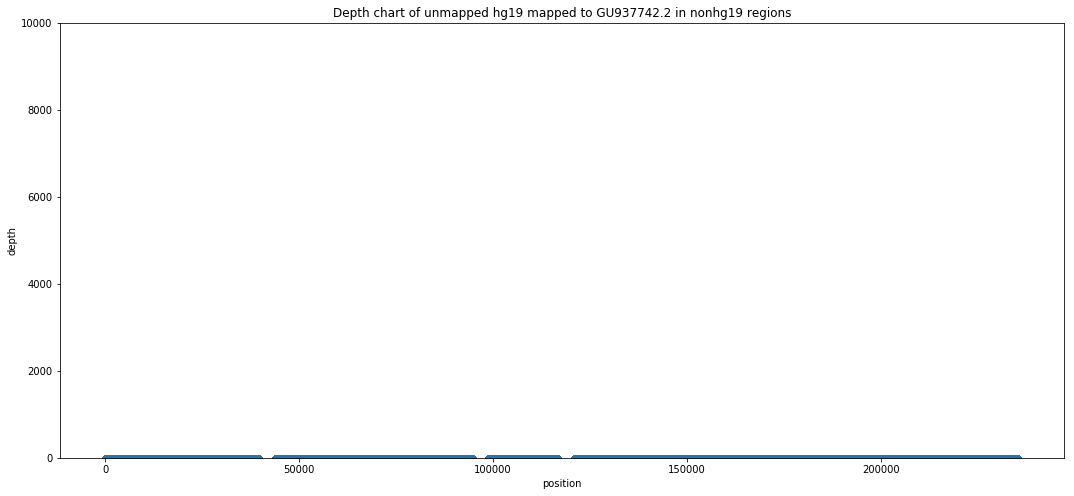

HQ646552.1
Hepatitis B virus clone 18.15, complete genome


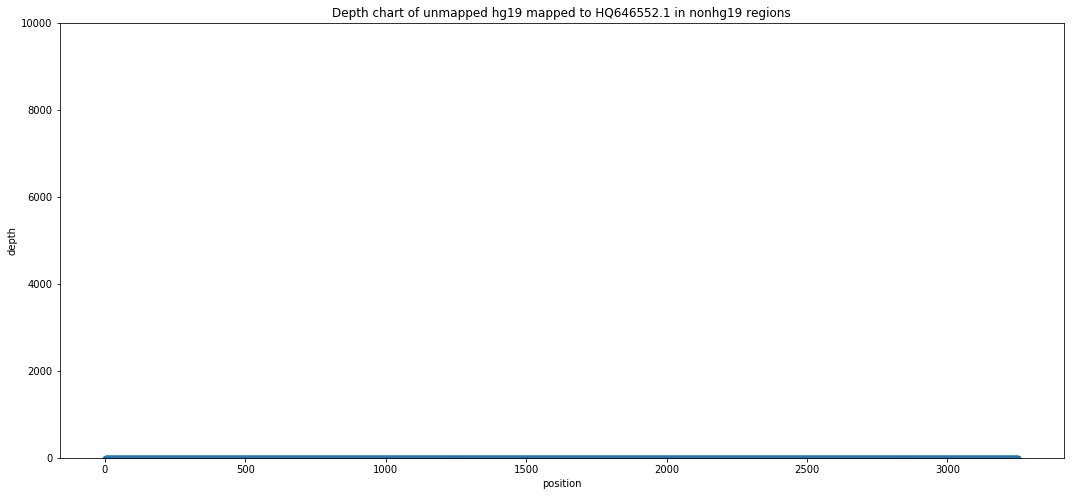

HQ646553.1
Hepatitis B virus clone 18.1, complete genome


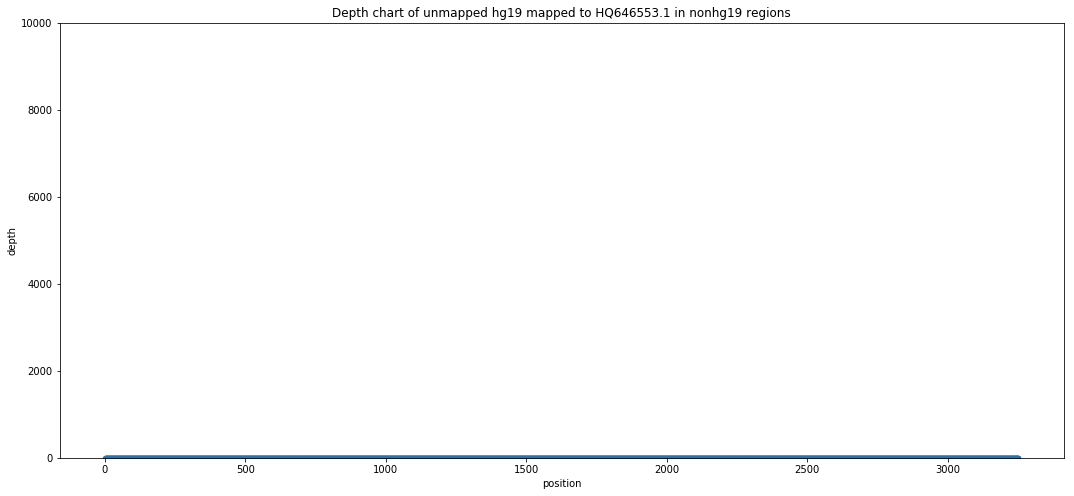

HQ646554.1
Hepatitis B virus clone 18.20, complete genome


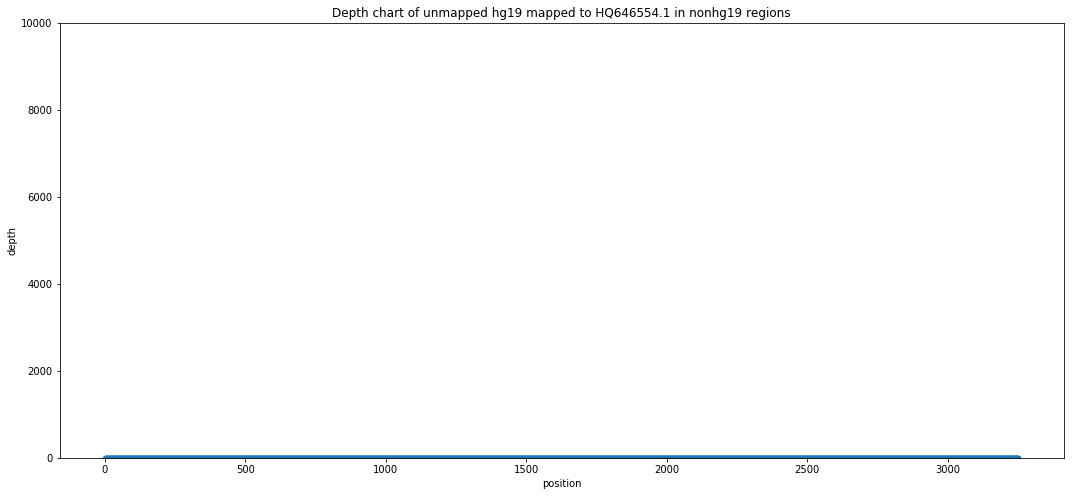

HQ646555.1
Hepatitis B virus clone 18.31, complete genome


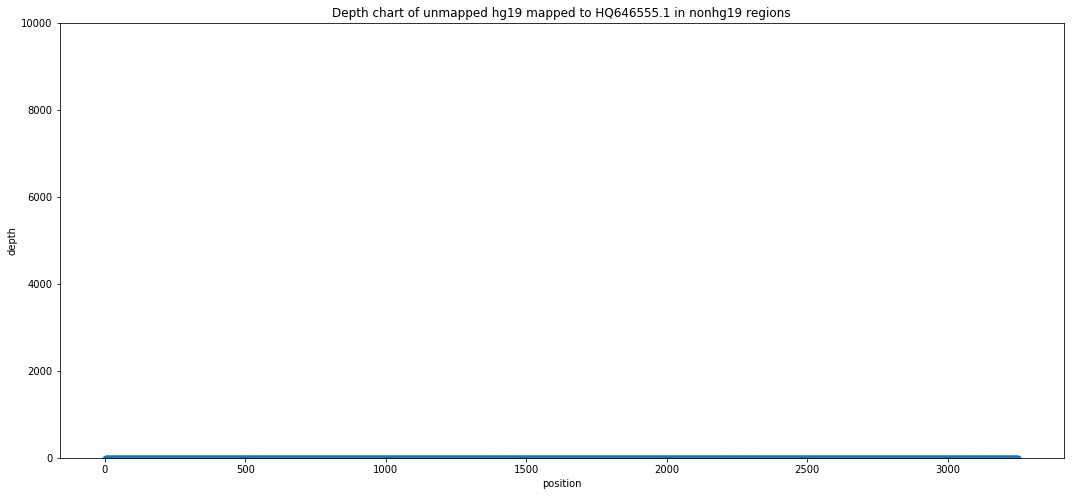

HQ646556.1
Hepatitis B virus clone 18.12, complete genome


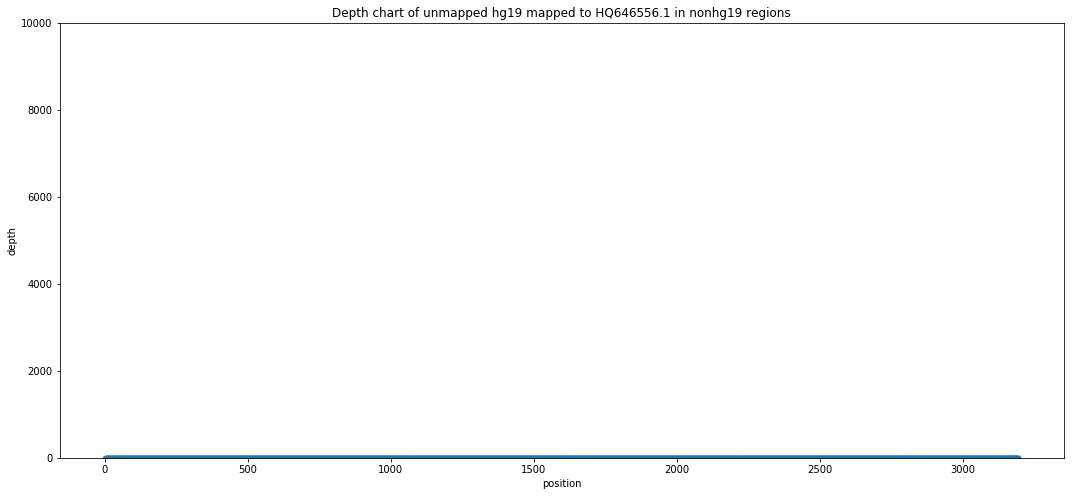

HQ696595.1
Human polyomavirus 9 isolate HPyV9, complete genome


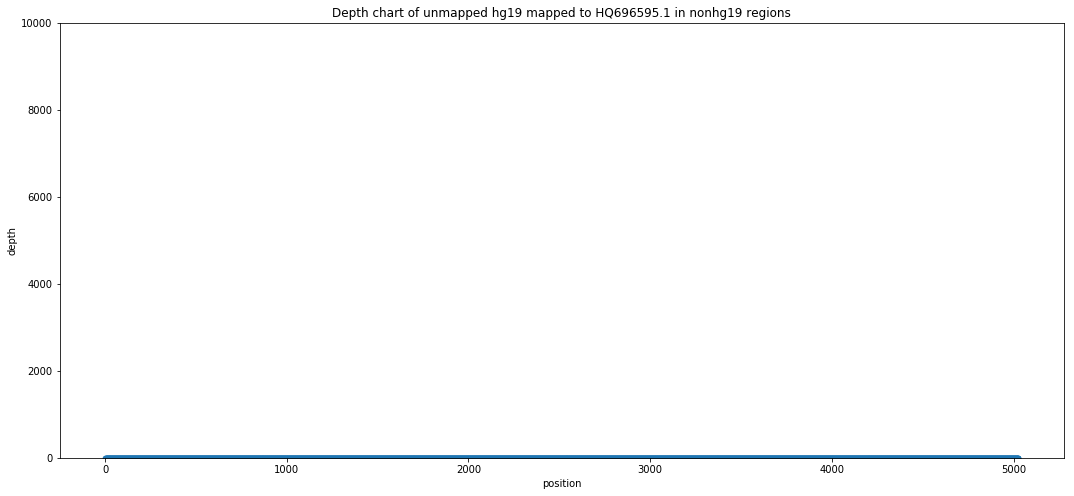

JF906559.1
Human papillomavirus 155 isolate SE42, complete genome


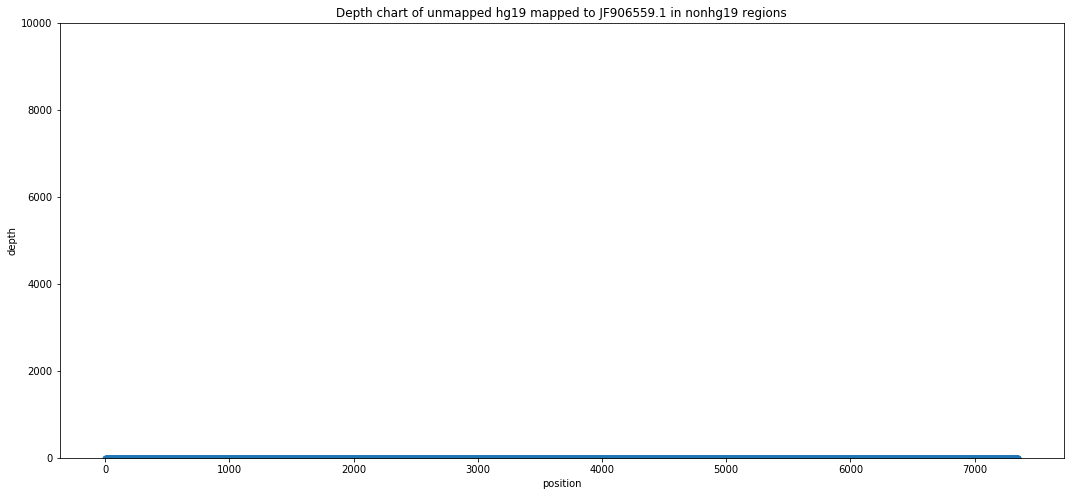

JQ619843.1
Human herpesvirus 8 strain DG1, complete genome


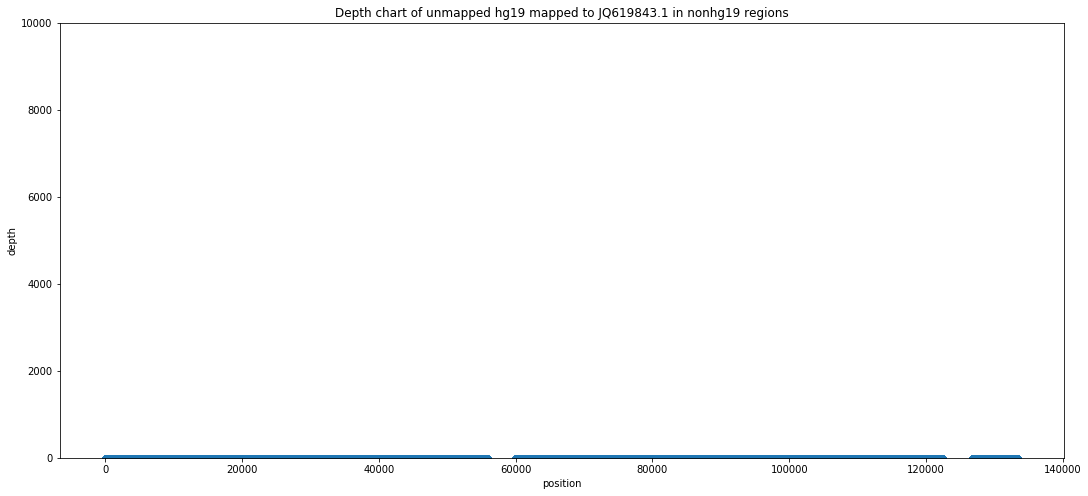

JX245014.1
Human immunodeficiency virus isolate 10Gab1190, complete genome


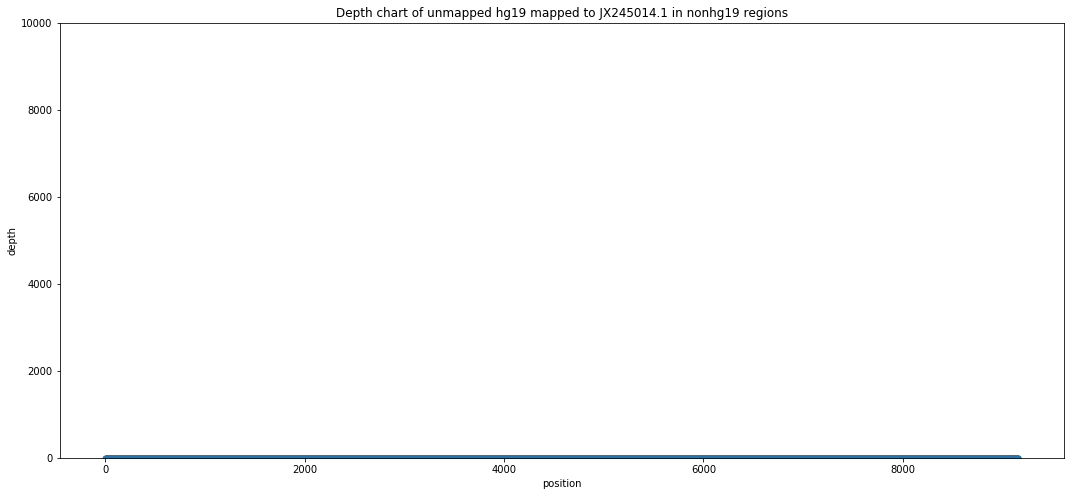

JX245015.1
Human immunodeficiency virus isolate 11Gab6352, complete genome


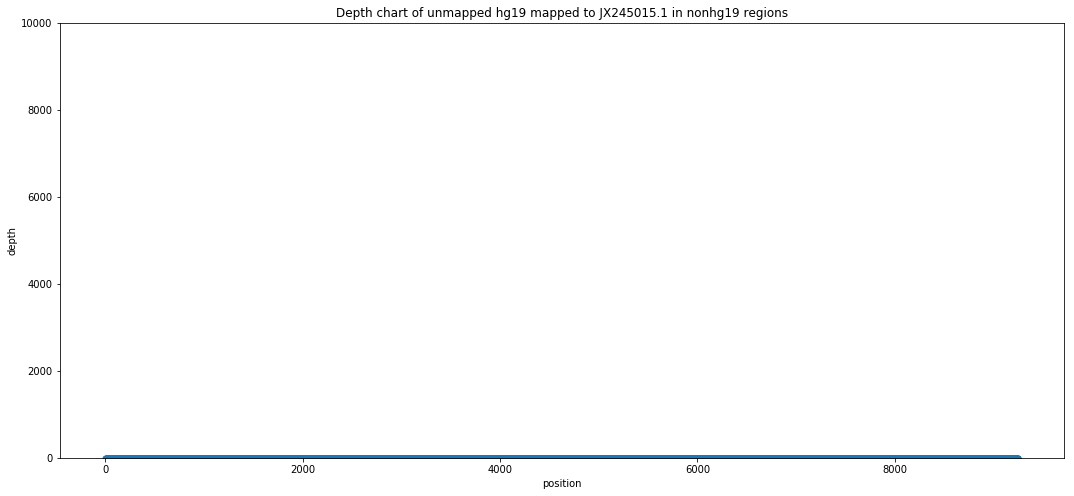

JX262162.1
Human polyomavirus 10 isolate 10ww, complete genome


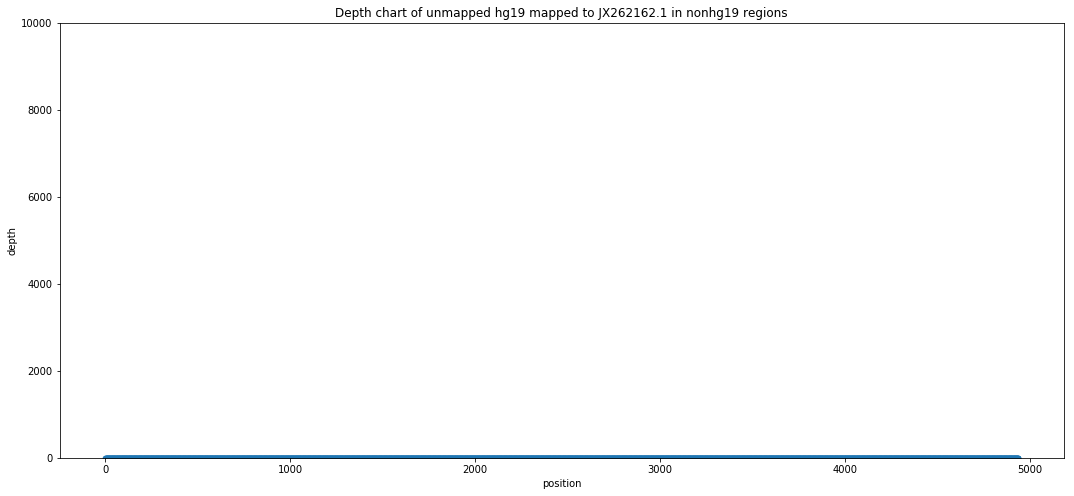

K02007.1
Human immunodeficiency virus type 1, isolate ARV-2/SF2, complete proviral genome


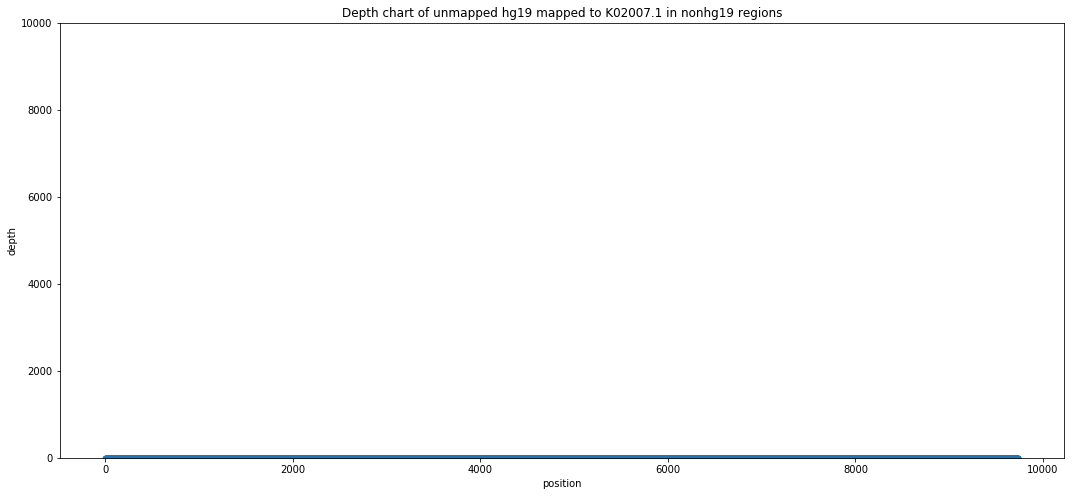

K03455.1
Human immunodeficiency virus type 1 (HXB2), complete genome; HIV1/HTLV-III/LAV reference genome


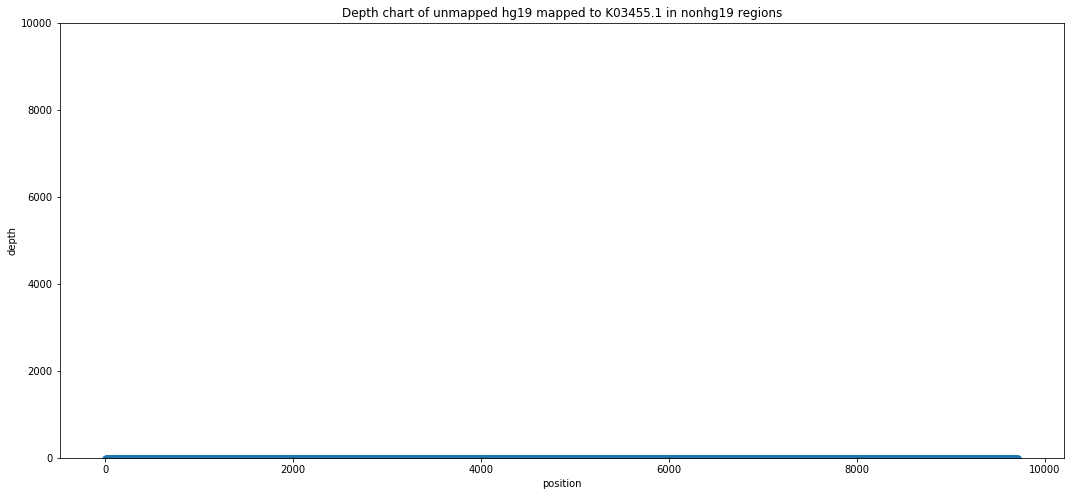

KC831440.1
Human polyomavirus 9 strain UF-1, complete genome


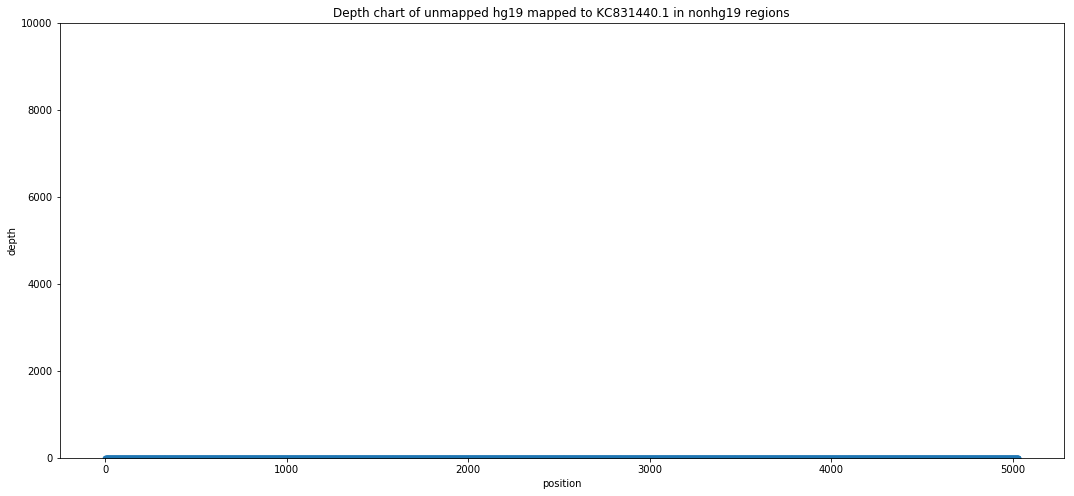

KF021605.1
Human herpesvirus 5 strain TR, complete genome


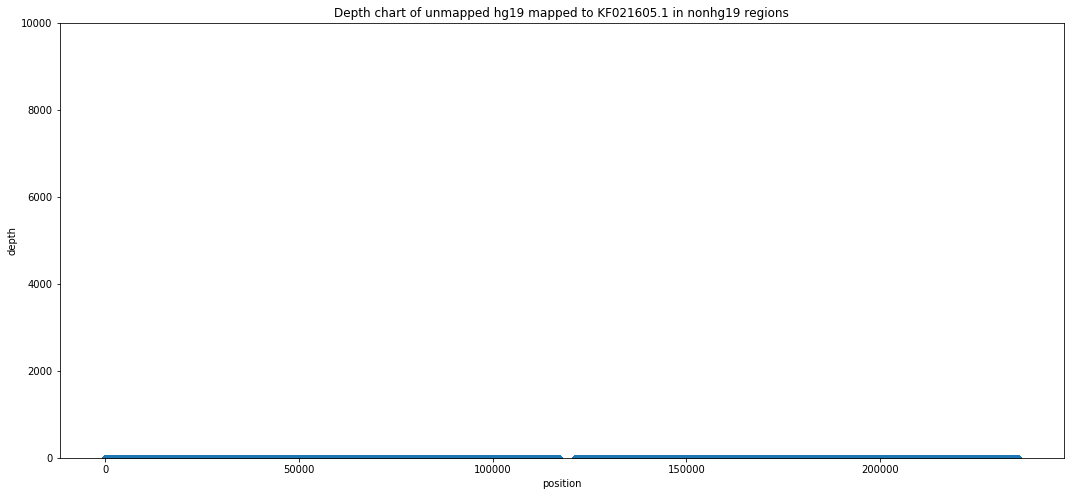

KF297339.1
Human herpesvirus 5 strain TB40/E clone Lisa, complete genome


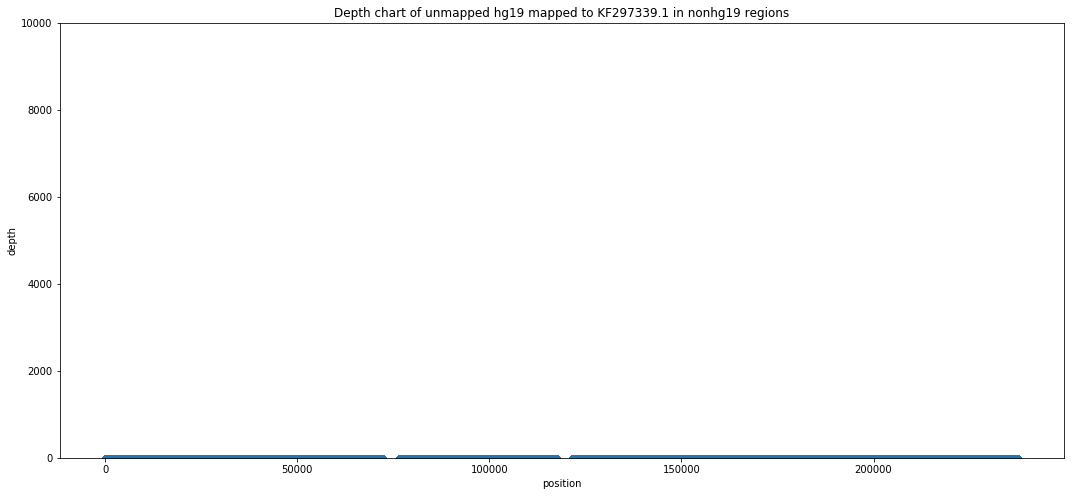

KF588566.1
Human herpesvirus 8 clone BrK.219#1_4, complete genome


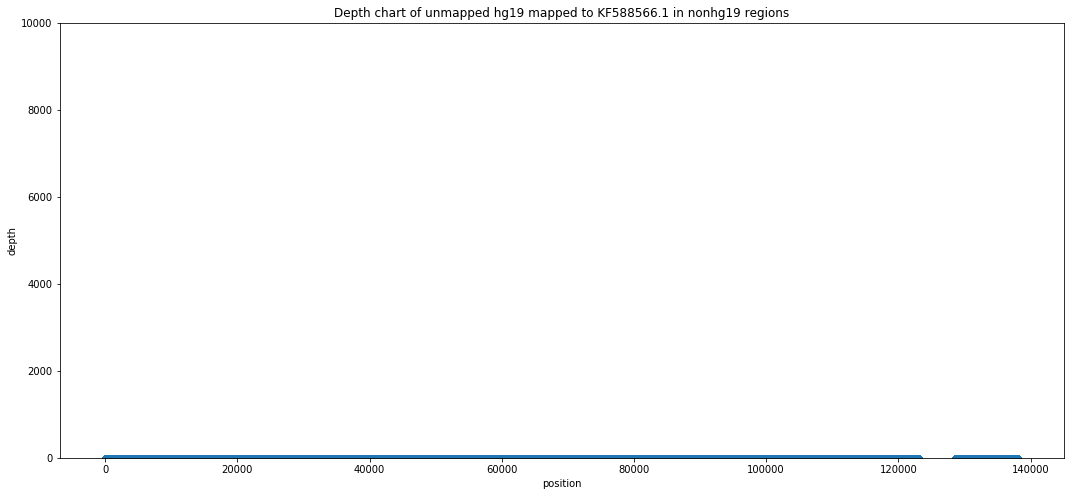

KM111555.2
Human immunodeficiency virus isolate JS2011001 from China gag polyprotein (gag) gene, complete cds; pol polyprotein (pol) gene, partial cds; vif protein (vif), vpr protein (vpr), tat protein (tat), rev protein (rev), and vpu protein (vpu) genes, complete cds; and nef protein (nef) gene, partial cds


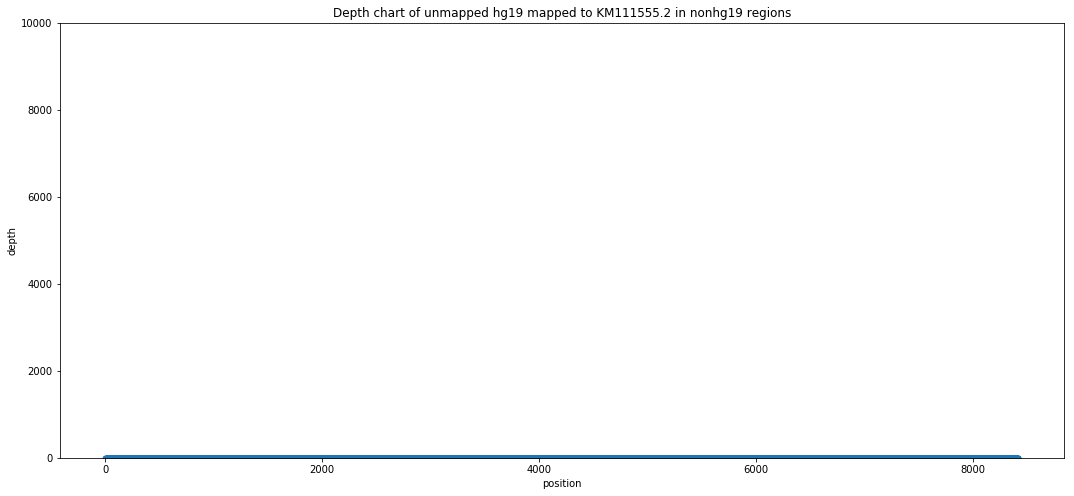

KP257584.1
Human herpesvirus 6A isolate AJ, complete genome


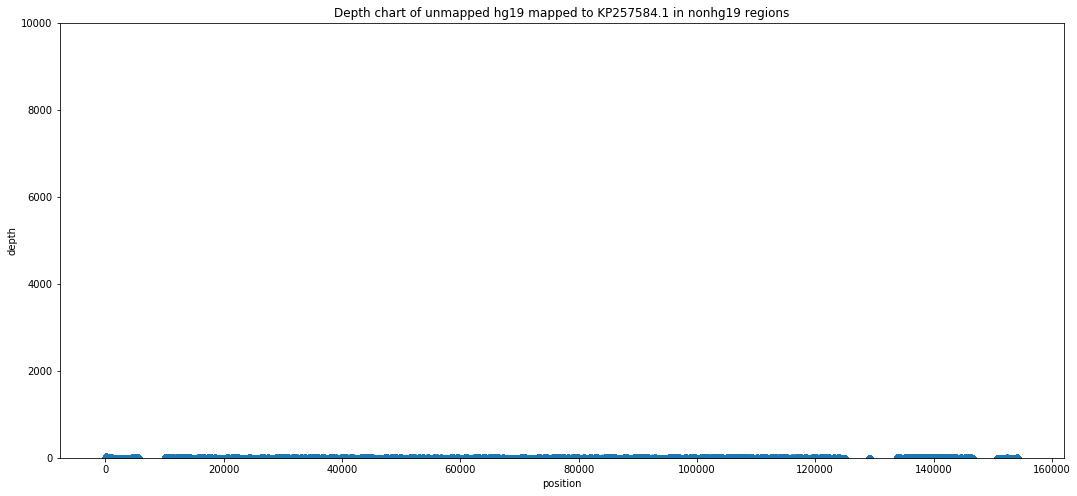

KP259281.1
Human pegivirus genotype 2 isolate H40048, complete genome


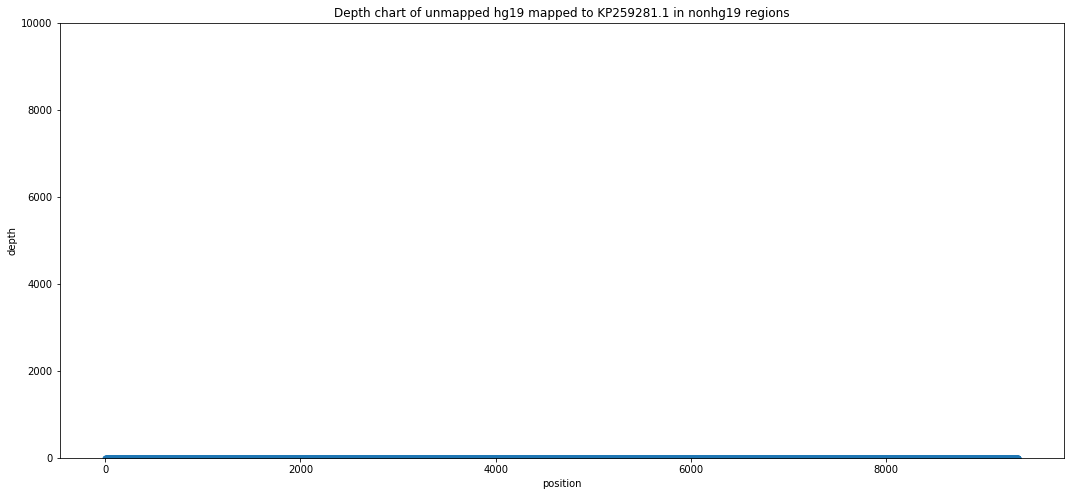

KU681081.3
Zika virus isolate Zika virus/H.sapiens-tc/THA/2014/SV0127- 14, complete genome


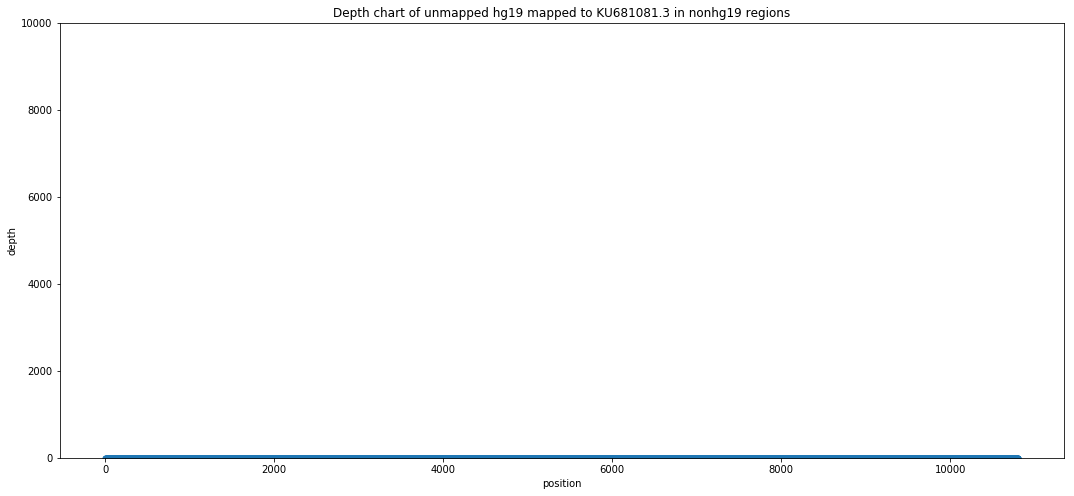

KU681082.3
Zika virus isolate Zika virus/H.sapiens-tc/PHL/2012/CPC-0740, complete genome


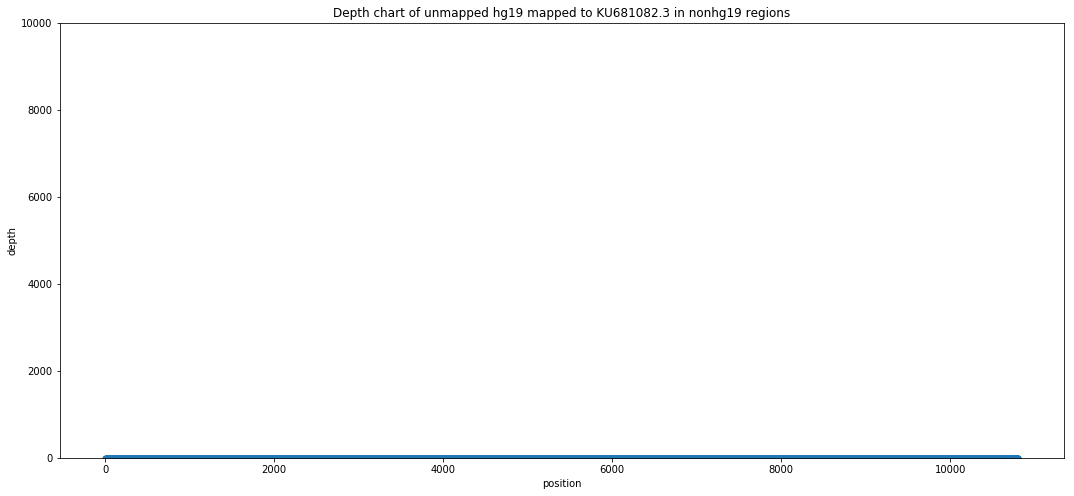

KU955591.1
Zika virus isolate Zika virus/A.africanus-tc/SEN/1984/41525-DAK, complete genome


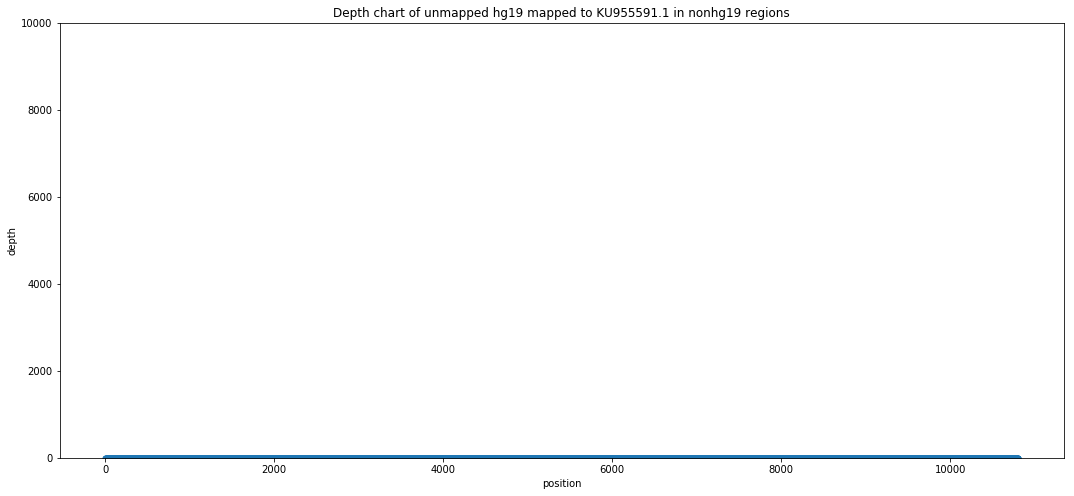

KU955592.1
Zika virus isolate Zika virus/A.taylori-tc/SEN/1984/41662-DAK, complete genome


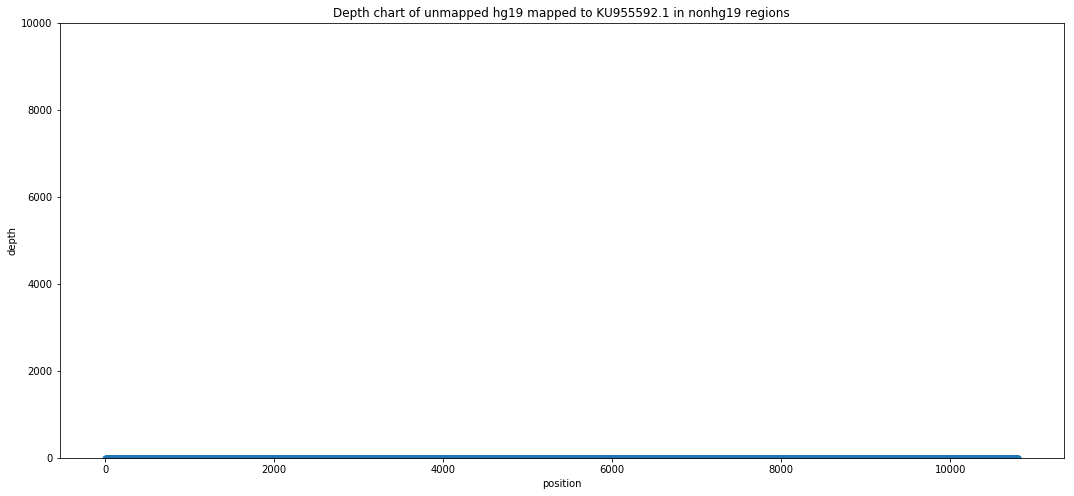

KU955593.1
Zika virus isolate Zika virus/H.sapiens-tc/KHM/2010/FSS13025, complete genome


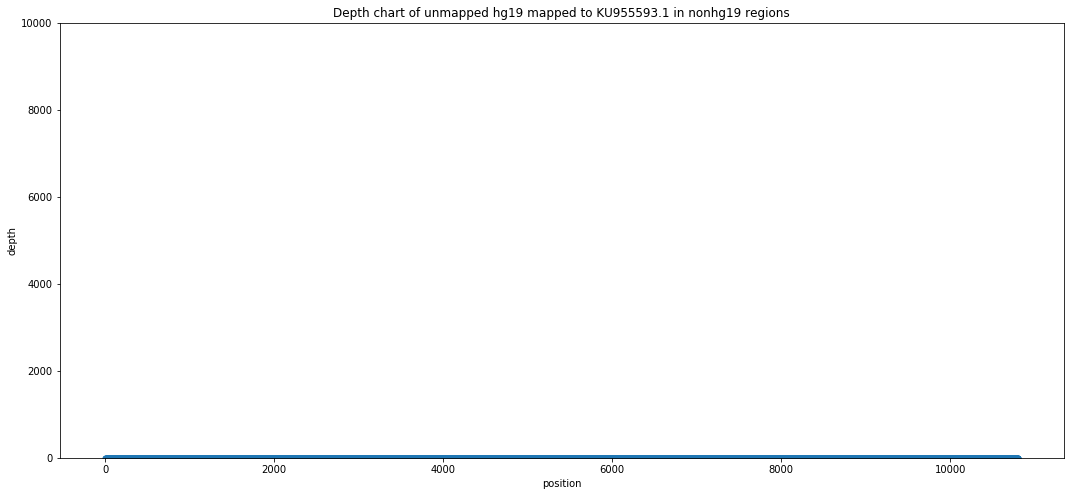

KU955594.1
Zika virus isolate Zika virus/M.mulatta-tc/UGA/1947/MR-766, complete genome


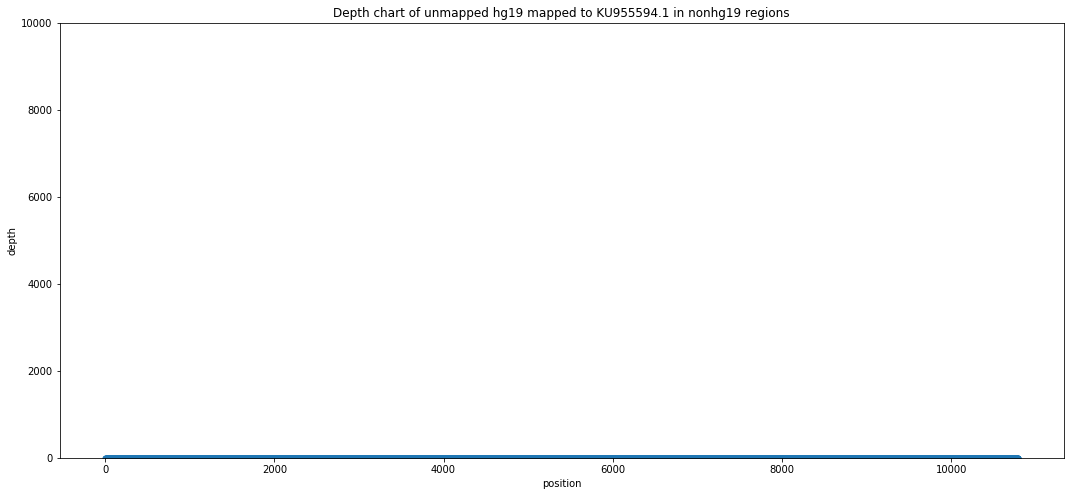

KU955595.1
Zika virus isolate Zika virus/A.taylori-tc/SEN/1984/41671-DAK, complete genome


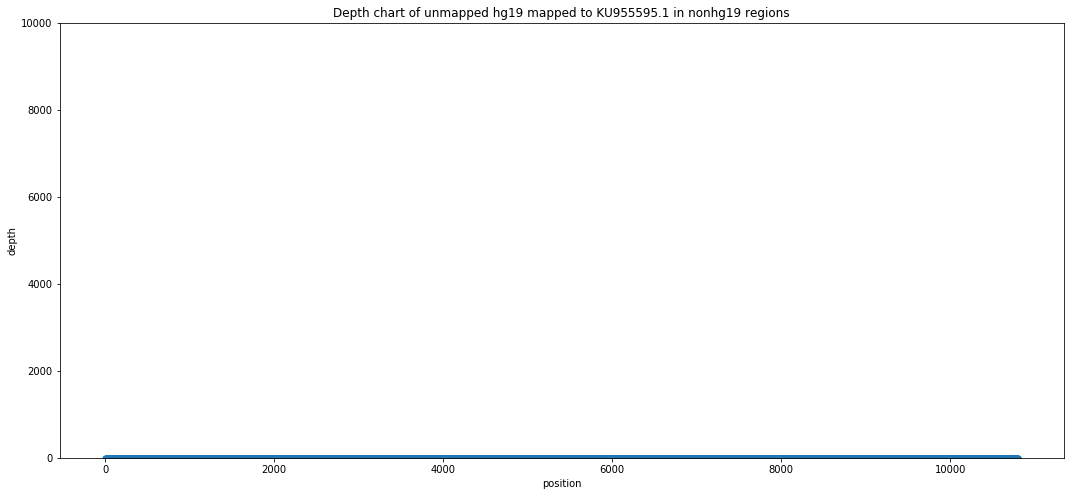

KX087102.2
Zika virus strain ZIKV/Homo sapiens/COL/FLR/2015, complete genome


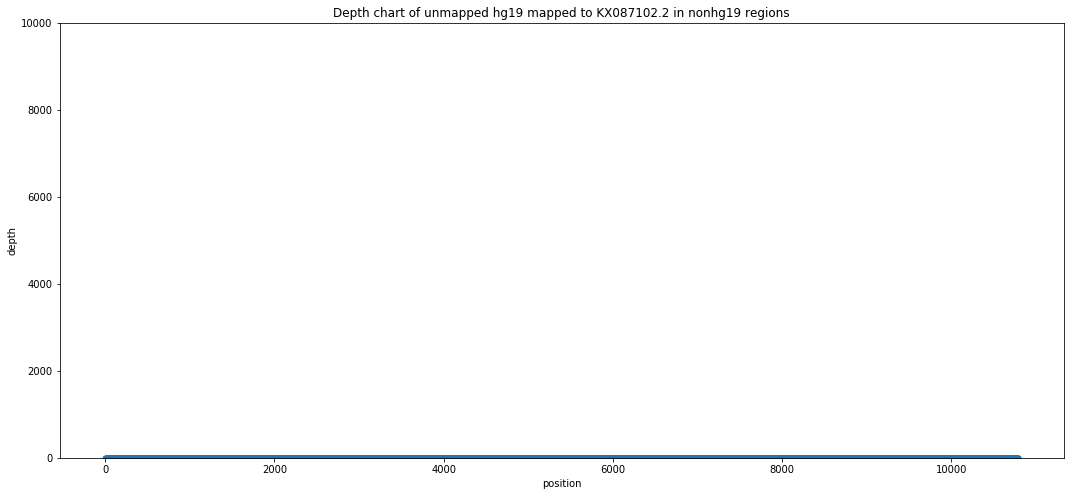

KX547618.1
West Nile virus strain WNV-1/Corvus brachyrhynchos/USA/0303357/2003, complete genome


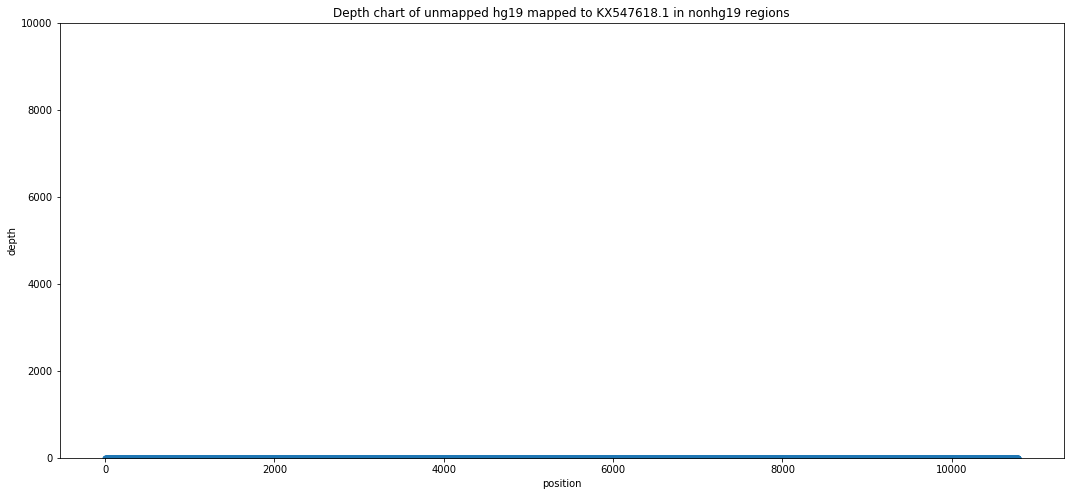

KX547619.1
West Nile virus strain WNV-1/Culiseta sp./USA/33020408/2002, complete genome


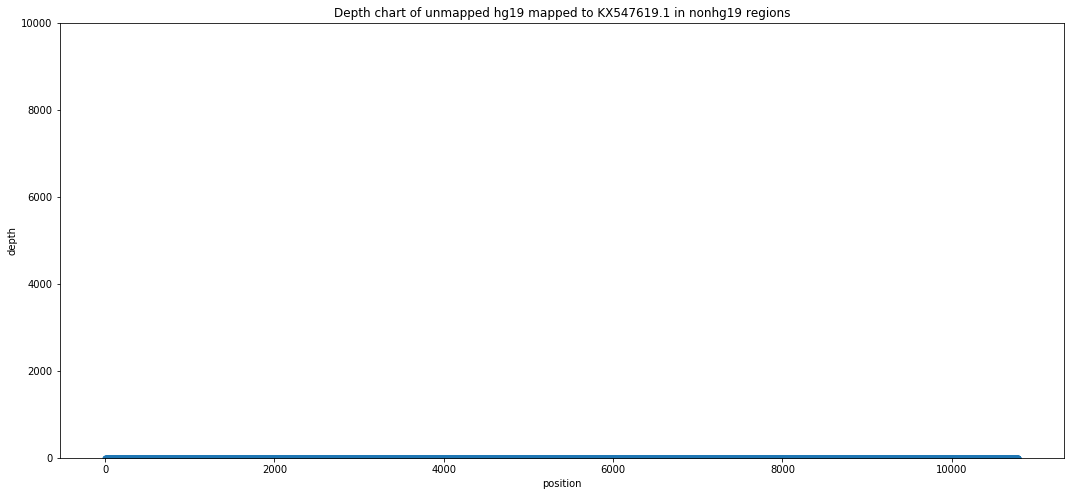

KX547620.1
West Nile virus strain WNV-1/Corvus brachyrhynchos/USA/02003322/2002, complete genome


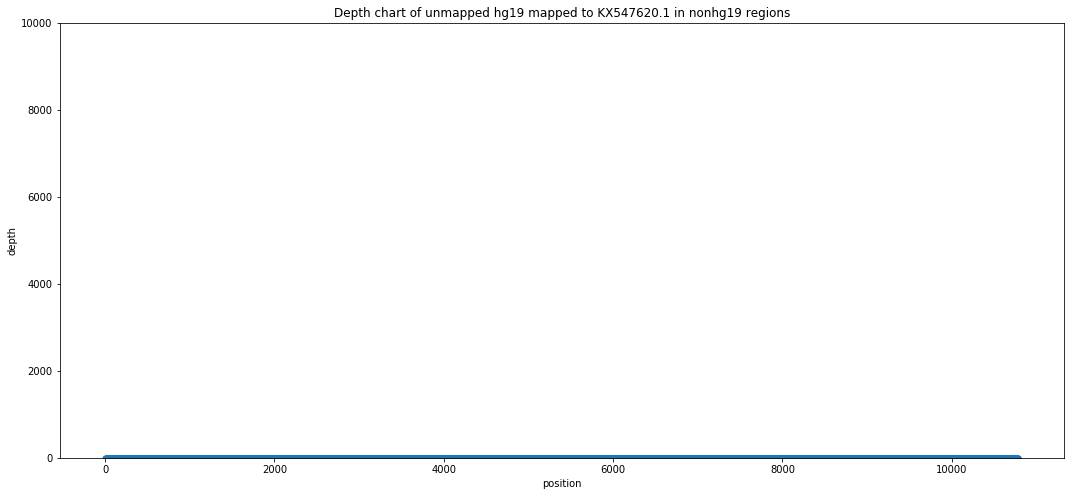

KX547621.1
West Nile virus strain WNV-1/Cyanocitta cristata /USA/04002851/2004, complete genome


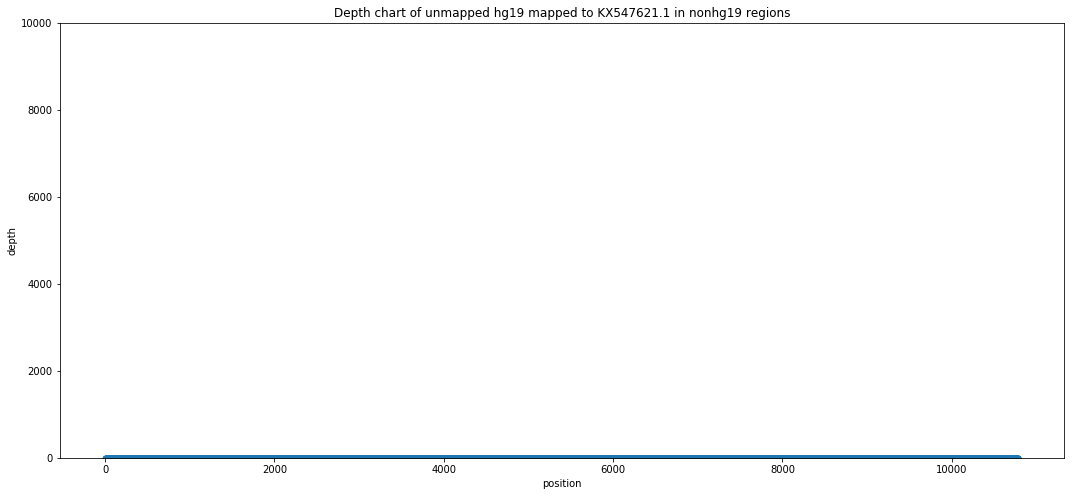

KX702400.1
Zika virus strain Zika virus/Homo sapiens/VEN/UF-1/2016, complete genome


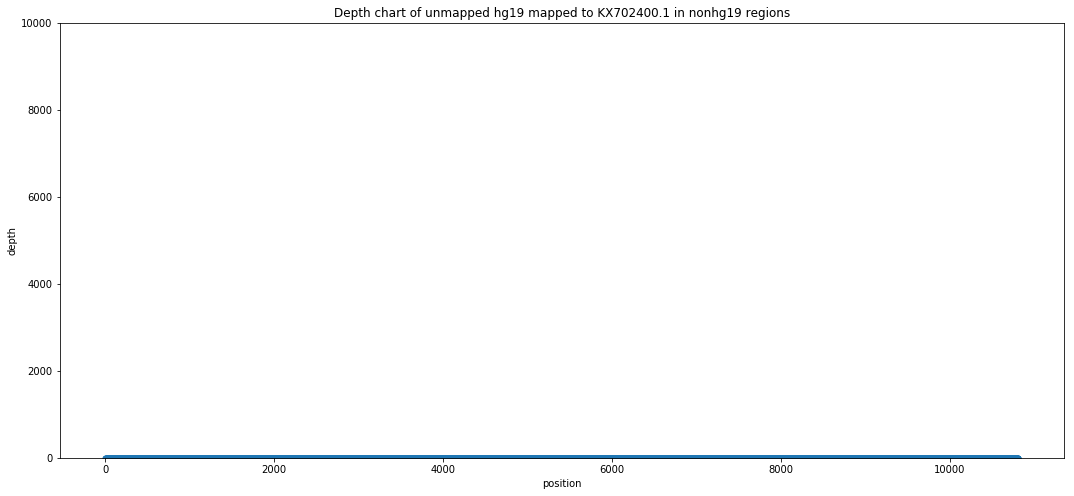

KX893855.1
Zika virus strain Zika virus/Homo sapiens/VEN/UF-2/2016, complete genome


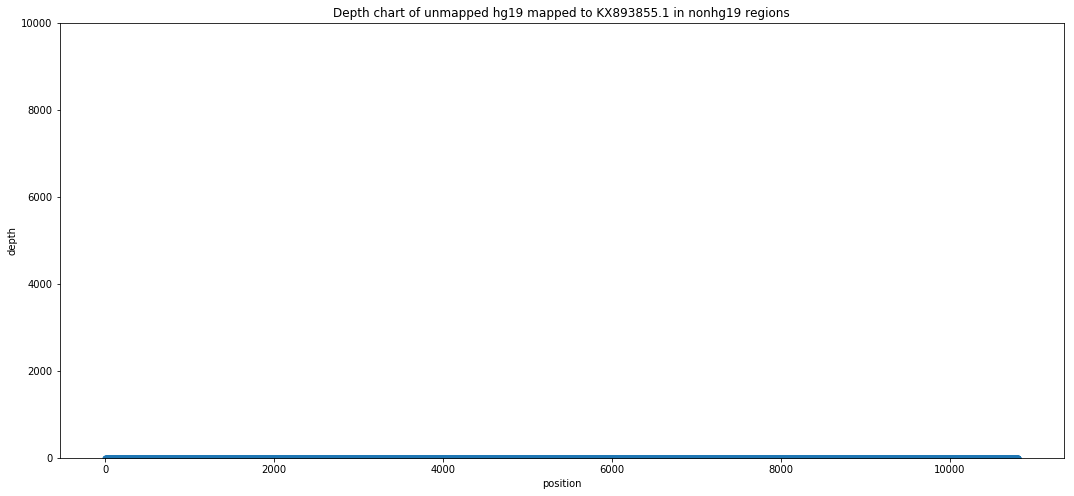

KX905202.1
Human T-lymphotropic virus 1 isolate VAN-EM5, complete genome


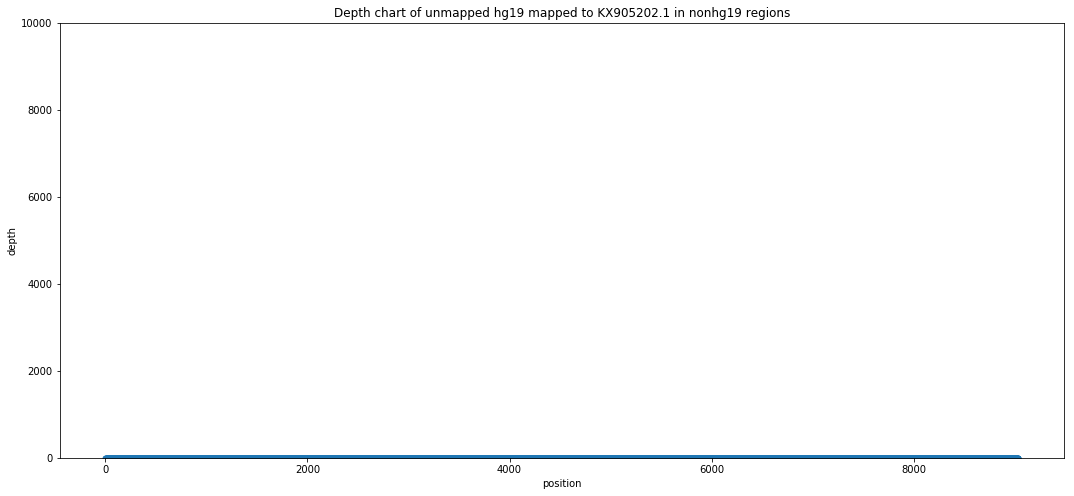

KY002685.1
Human adenovirus isolate Yunnan/KM04/2016, complete genome


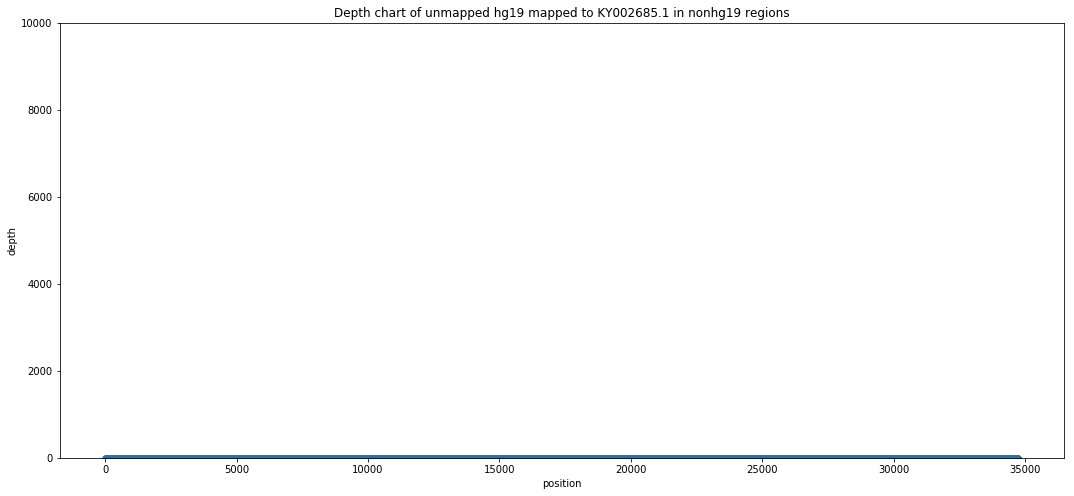

KY094066.1
BeAn 58058 virus, complete genome


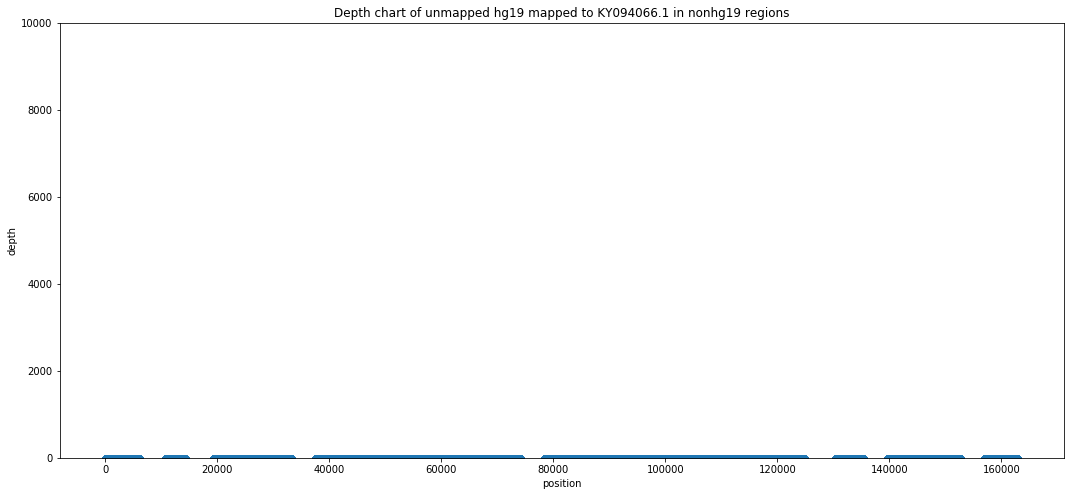

KY132094.1
Human polyomavirus 1 isolate AR11, complete genome


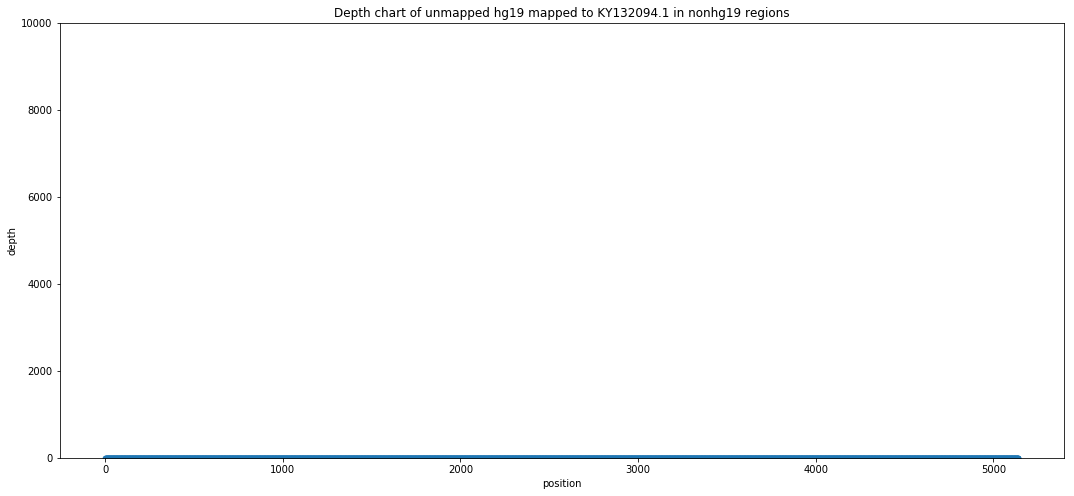

LC215429.1
Human adenovirus DNA, complete genome, strain: case67_20121578


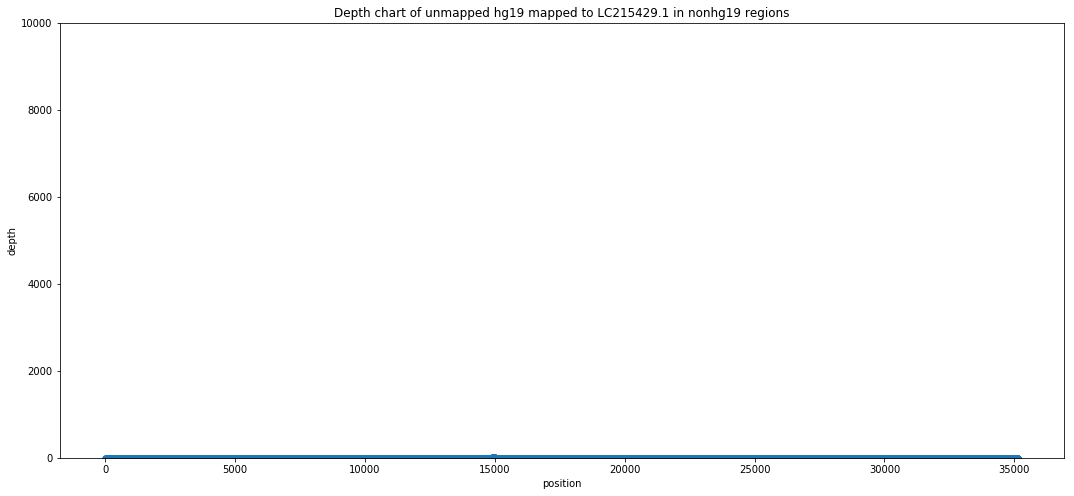

LC215433.1
Human adenovirus DNA, complete genome, strain: case110_20131573


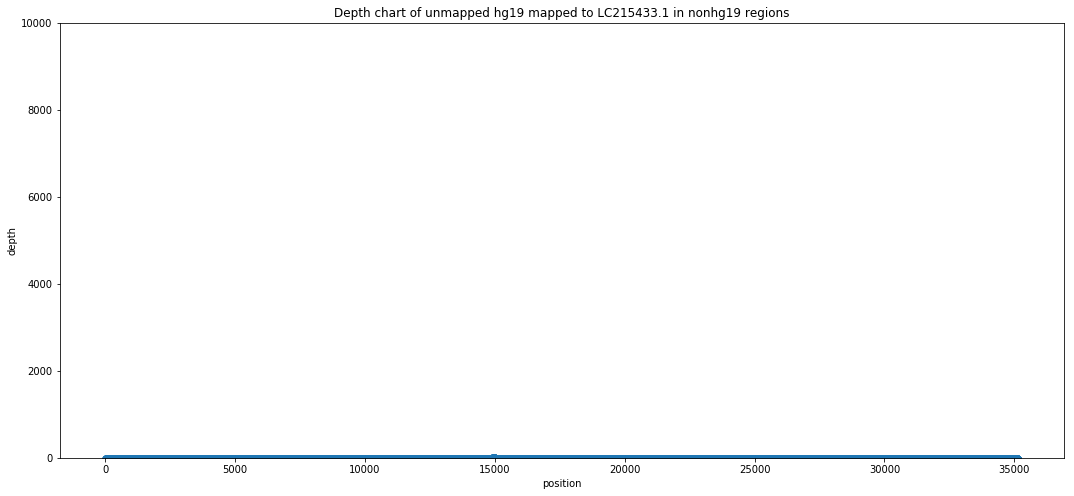

LC215434.1
Human adenovirus DNA, complete genome, strain: case111_20131575


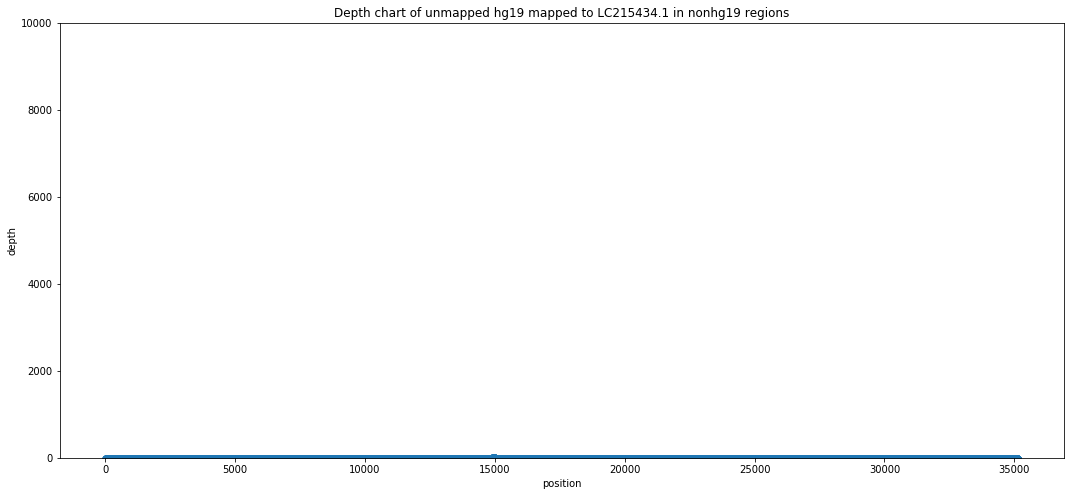

LC215435.1
Human adenovirus DNA, complete genome, strain: case112_20131578


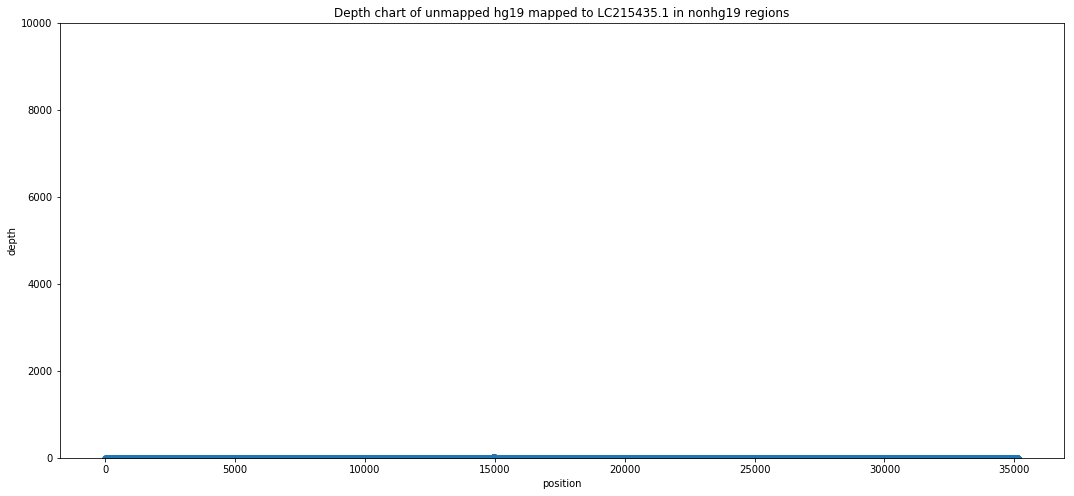

LC215436.1
Human adenovirus DNA, complete genome, strain: case113_20131581


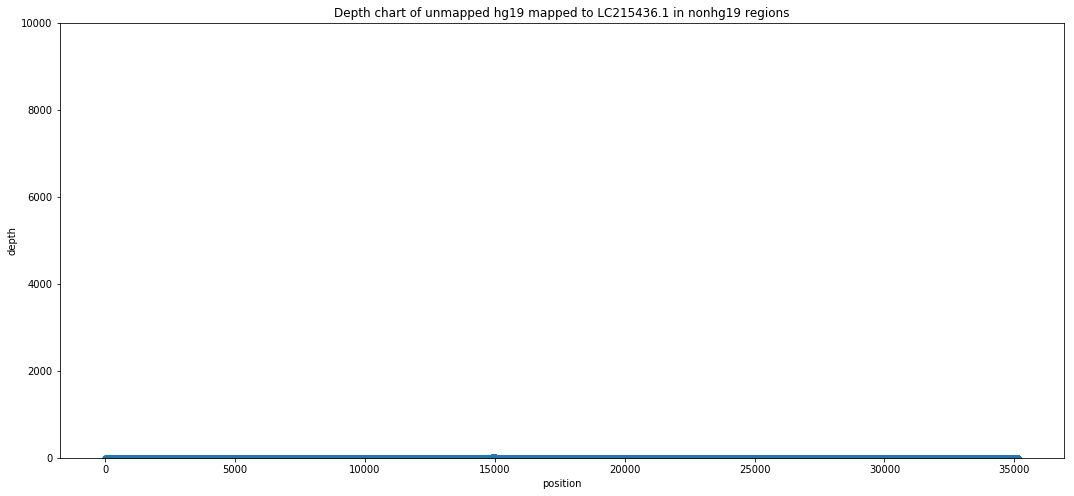

LC215437.1
Human adenovirus DNA, complete genome, strain: case118_20131587


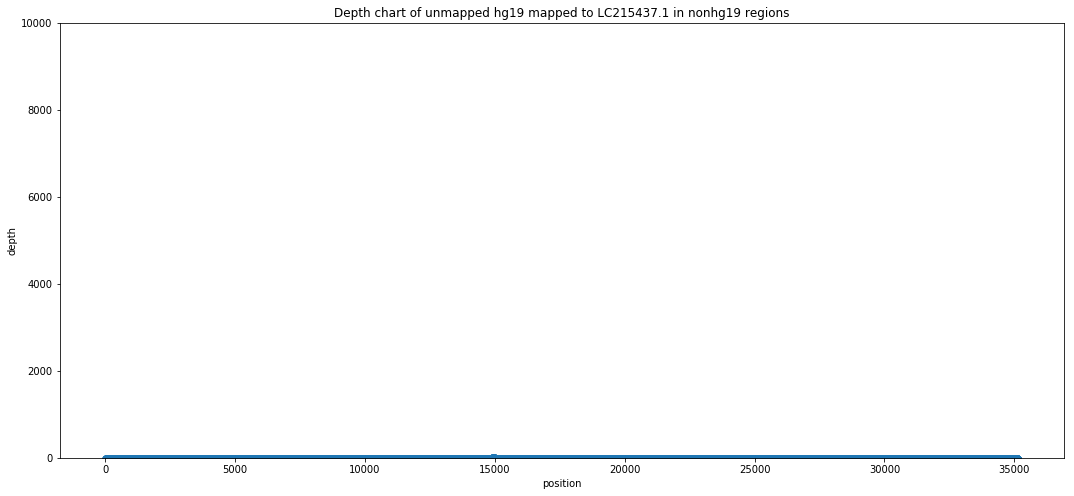

LC309239.1
Human polyomavirus 1 DNA, complete genome, isolate: TOM-11


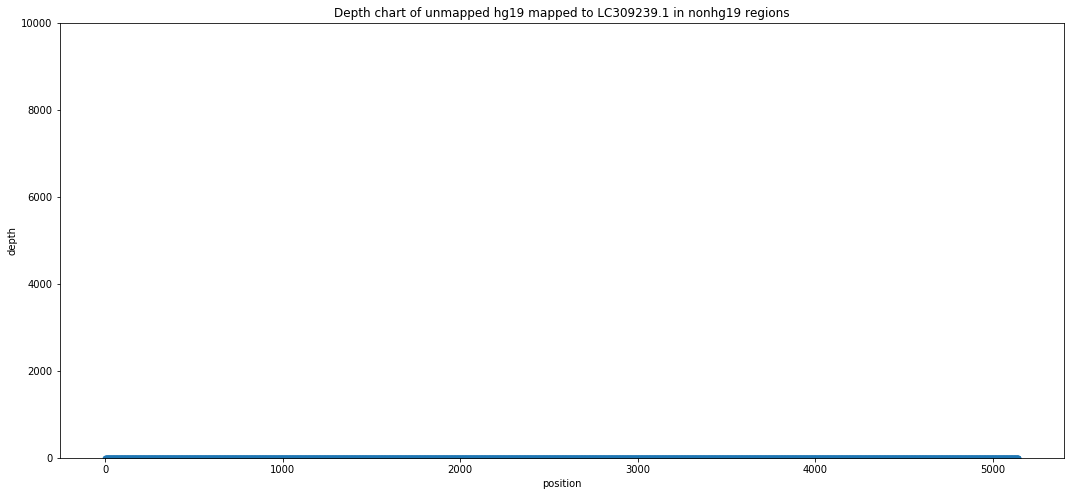

LC309240.1
Human polyomavirus 1 DNA, complete genome, isolate: TOM-16


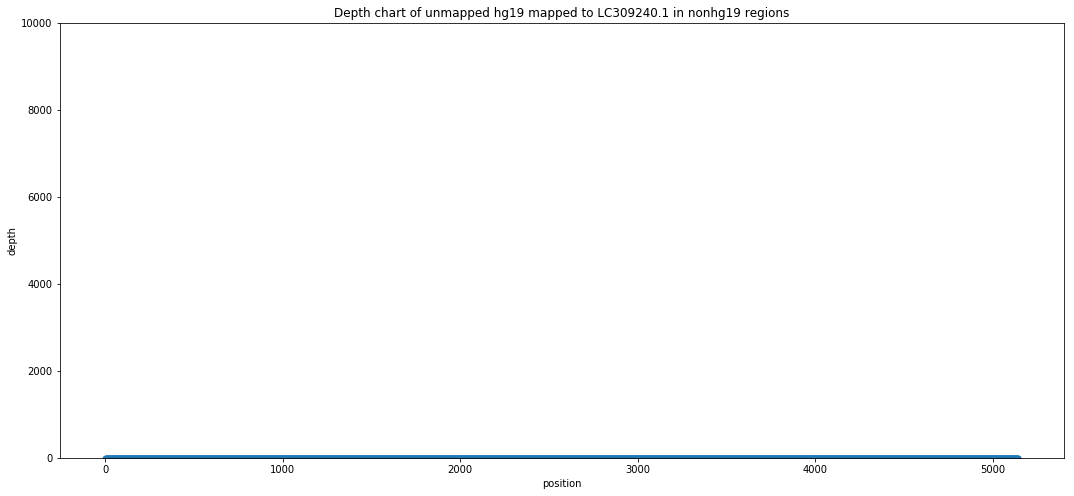

M10060.1
Human T-lymphotropic virus 2, complete proviral genome


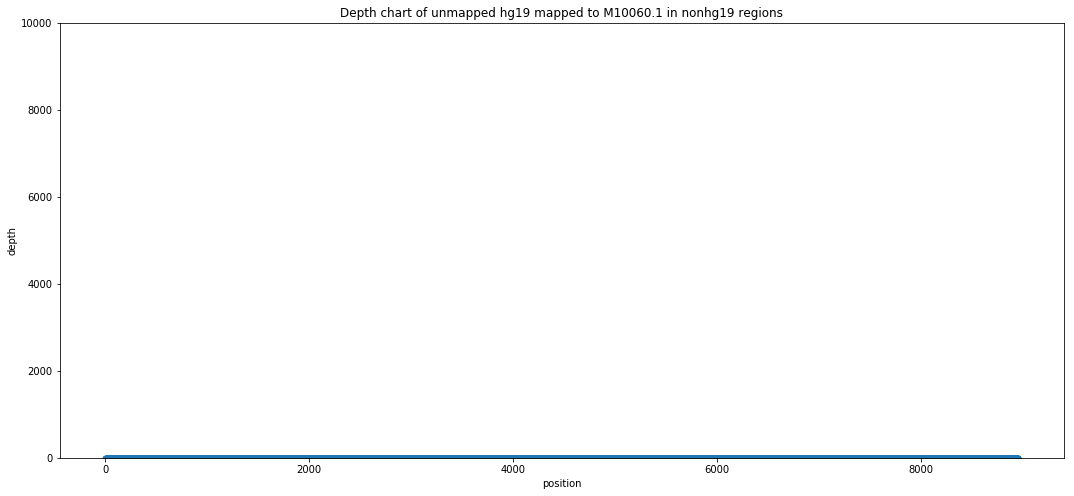

M12294.2
West Nile virus RNA, complete genome


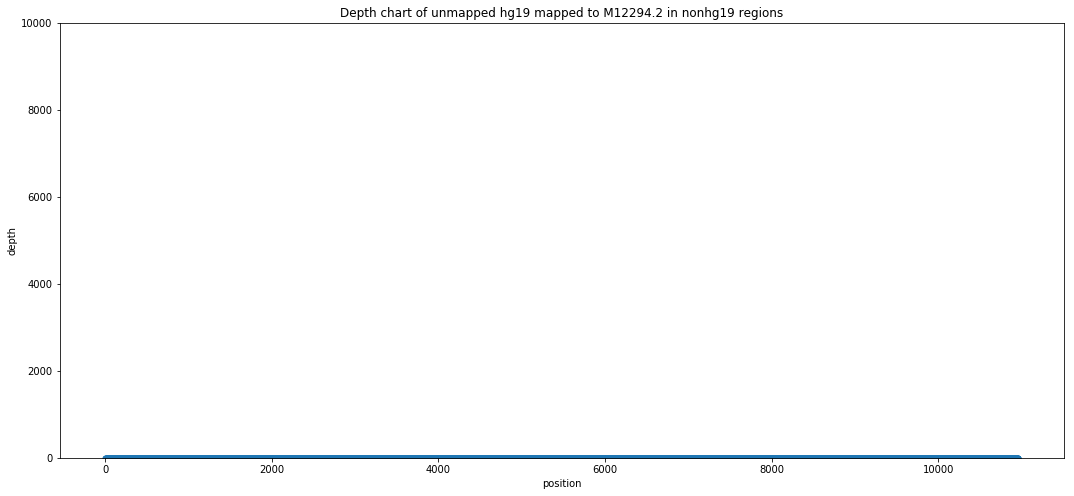

M15390.1
Human immunodeficiency virus type 2, isolate ROD, complete proviral genome


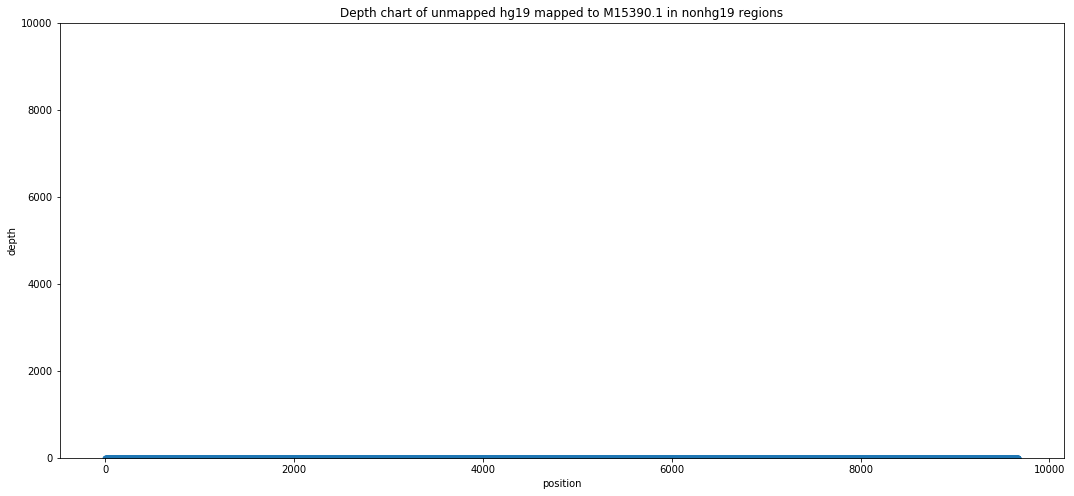

M17451.1
Human immunodeficiency virus type 1, isolate RF (HAT-3), complete genome


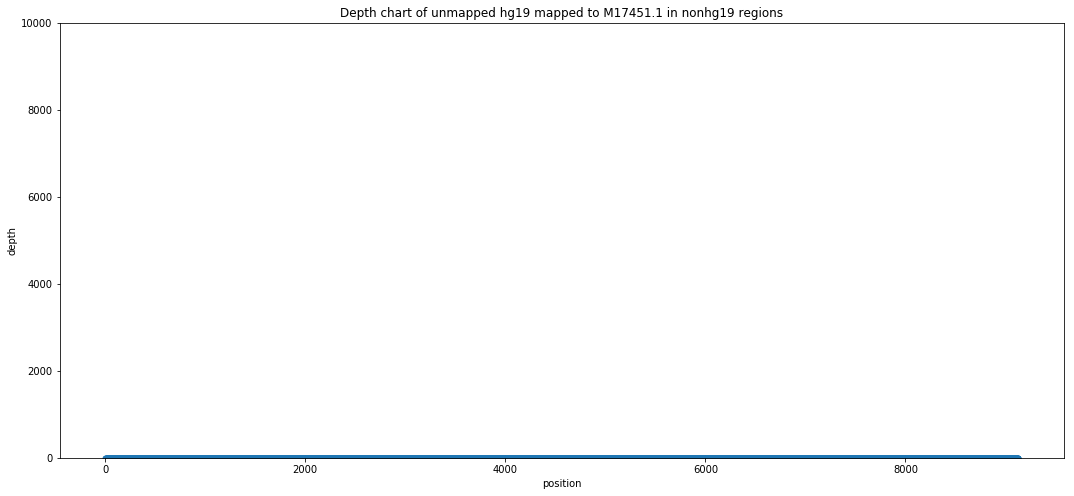

M20273.1
Human hepatitis virus type A RNA, complete genome


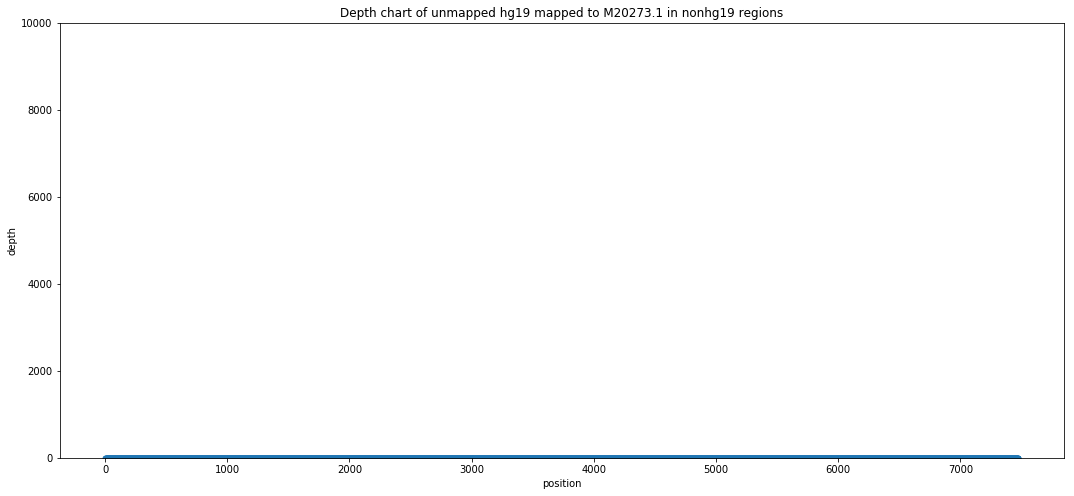

M26727.1
Human immunodeficiency virus type 1 (HIV-1) proviral DNA, complete genome


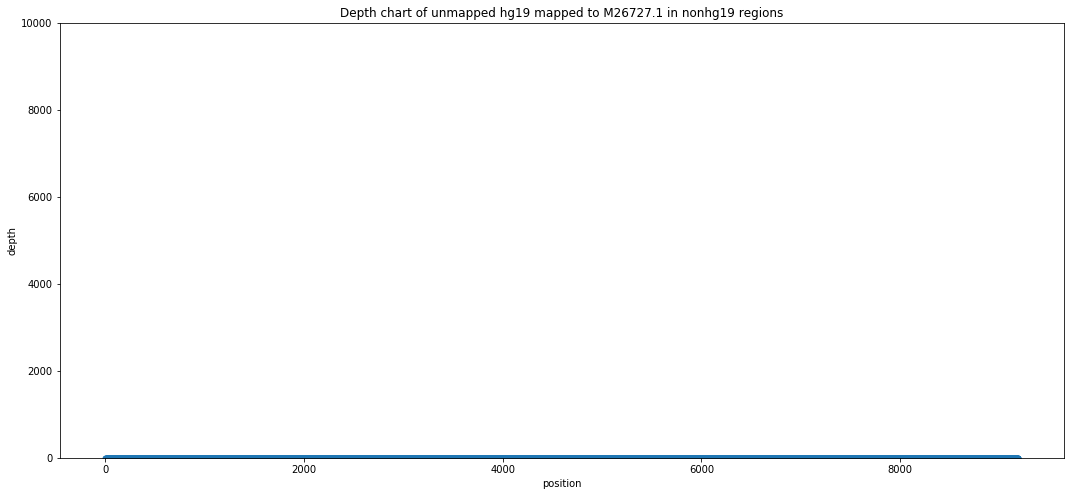

M27323.1
Human immunodeficiency virus type 1 (HIV-1) proviral complete genome


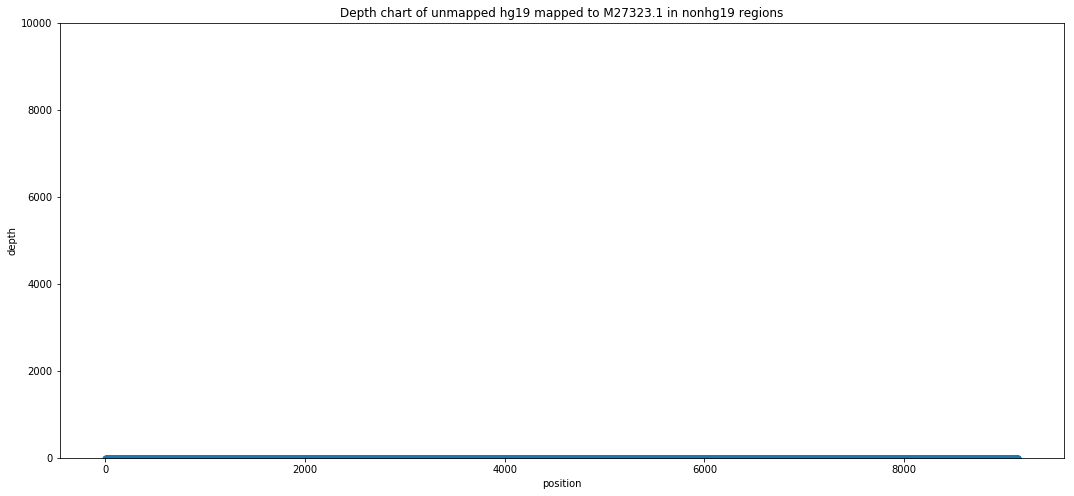

MF797870.1
West Nile virus strain WNV_Cy2016, complete genome


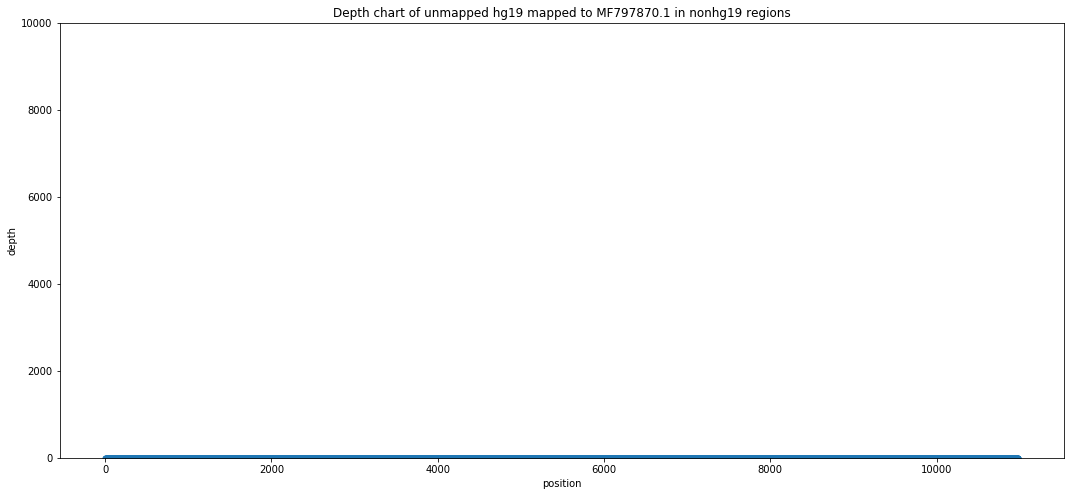

MH053115.1
Human pegivirus isolate JD2B2C, complete genome


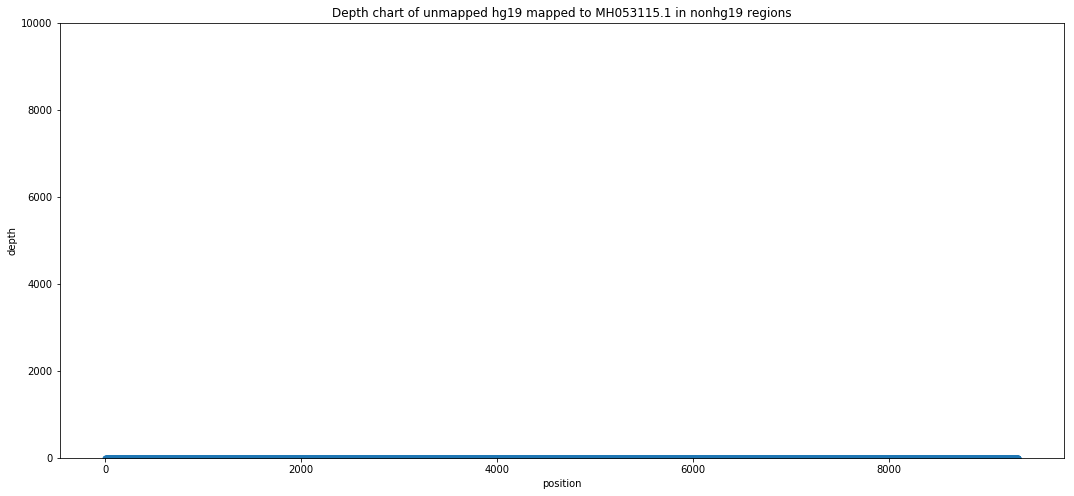

MH053116.1
Human pegivirus isolate JD2B7I, complete genome


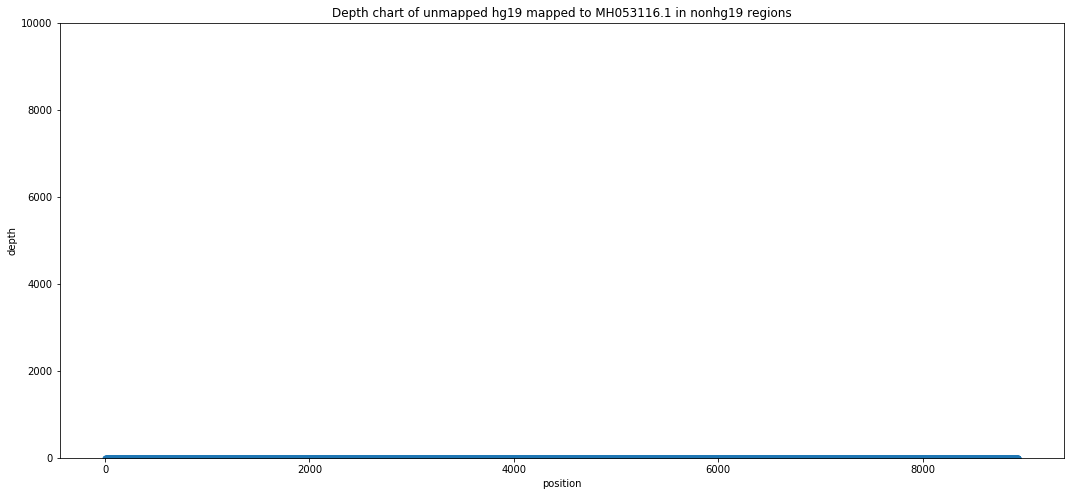

MH053117.1
Human pegivirus isolate JD2B9I, complete genome


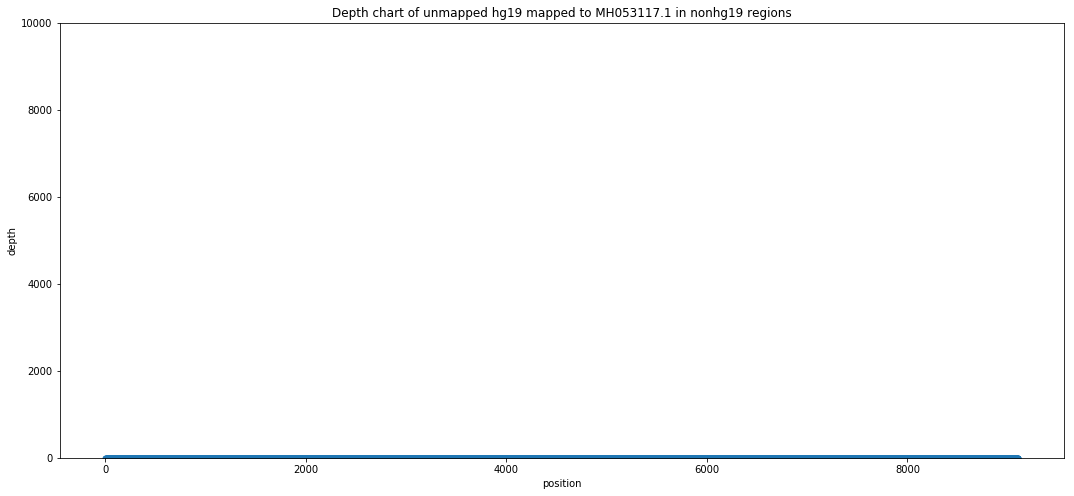

MH053118.1
Human pegivirus isolate JD2B15C, complete genome


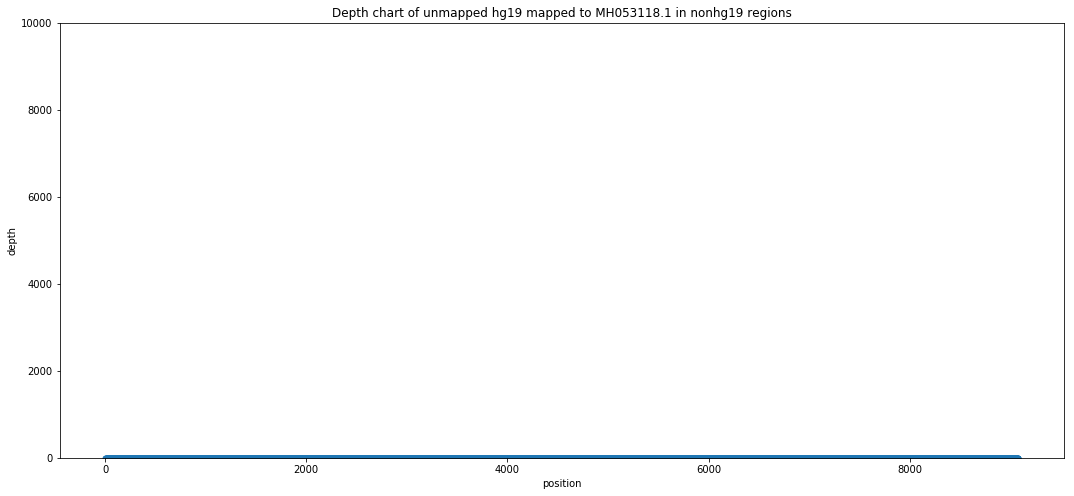

MH053119.1
Human pegivirus isolate JD2B1I, complete genome


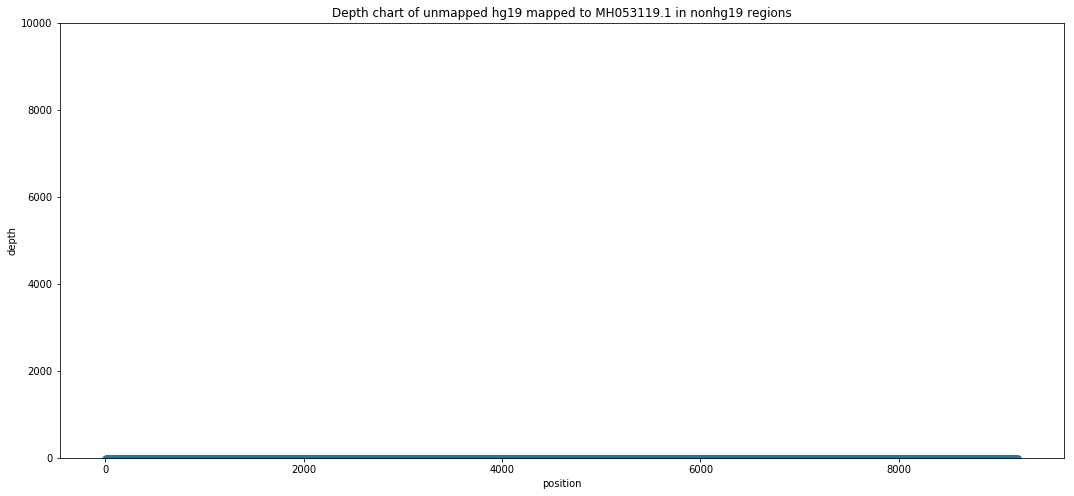

MH053120.1
Human pegivirus isolate JD2B3C, complete genome


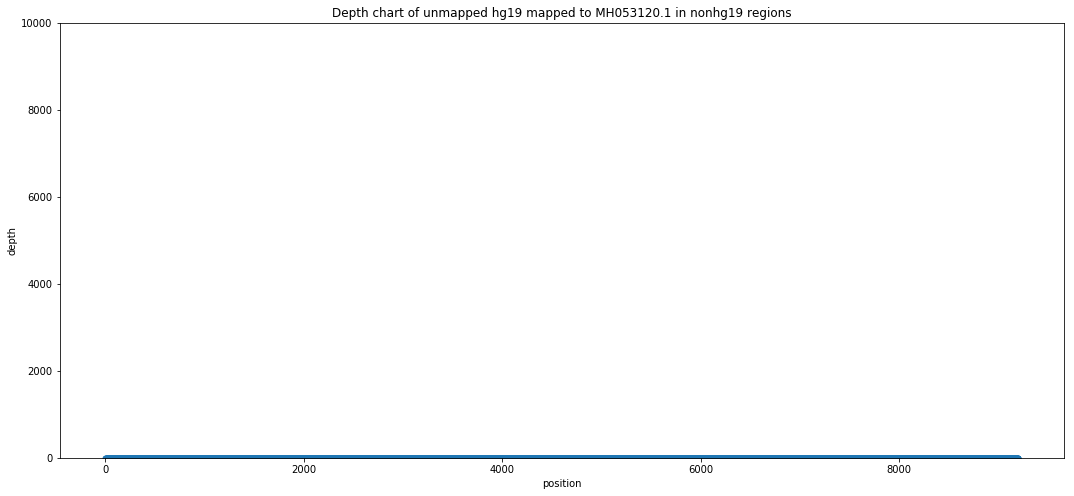

MH053121.1
Human pegivirus isolate JD2B8C, complete genome


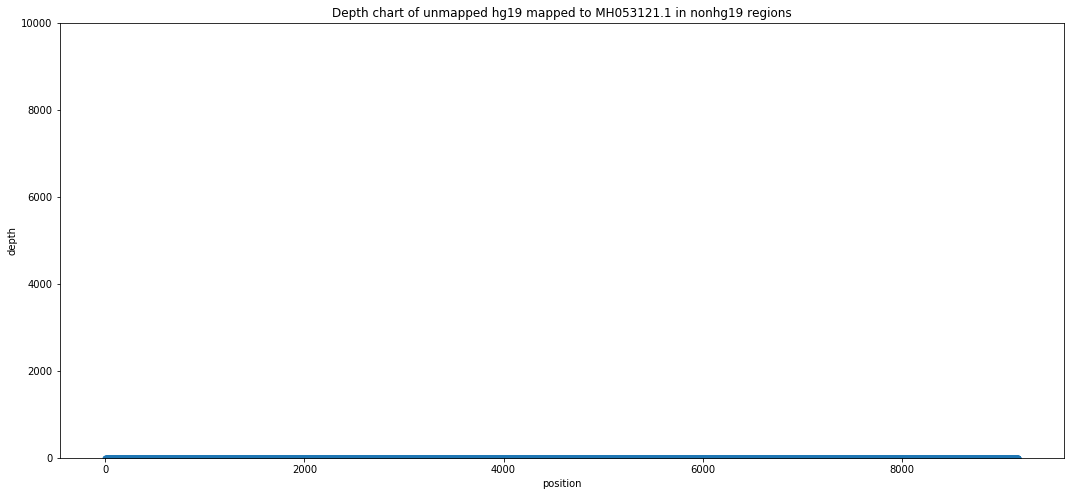

MH179063.1
Human pegivirus isolate LE-1, complete genome


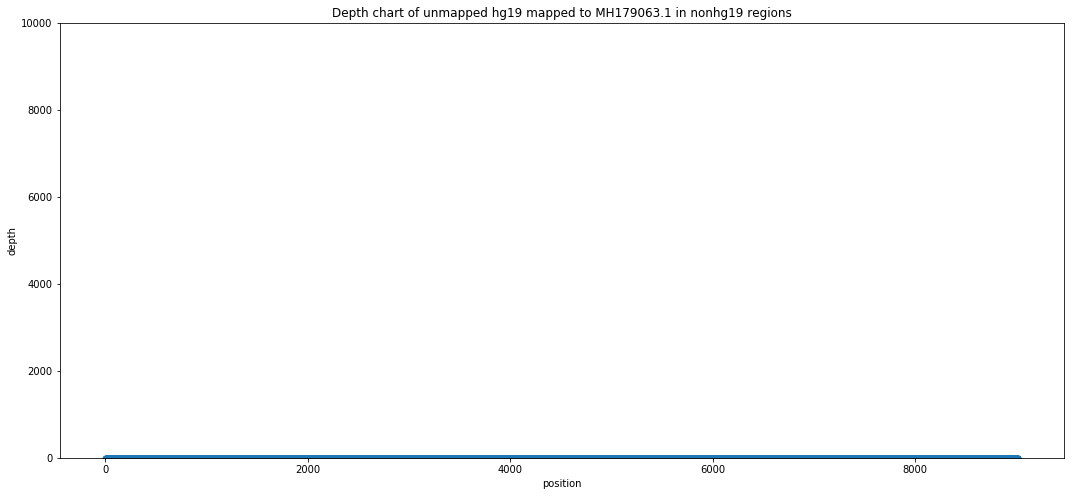

MH746815.1
Human pegivirus isolate GBV-C-ZJ-180501, complete genome


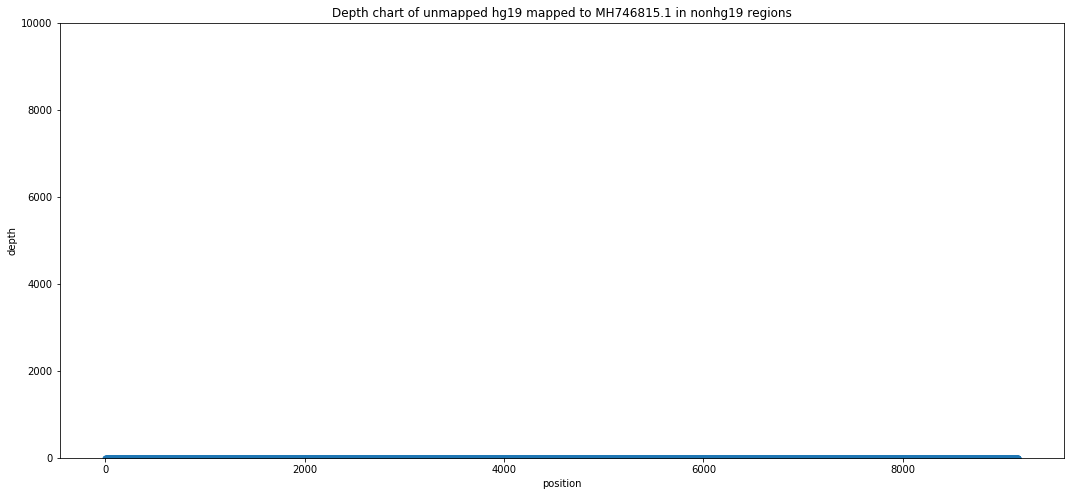

NC_000898.1
Human herpesvirus 6B, complete genome


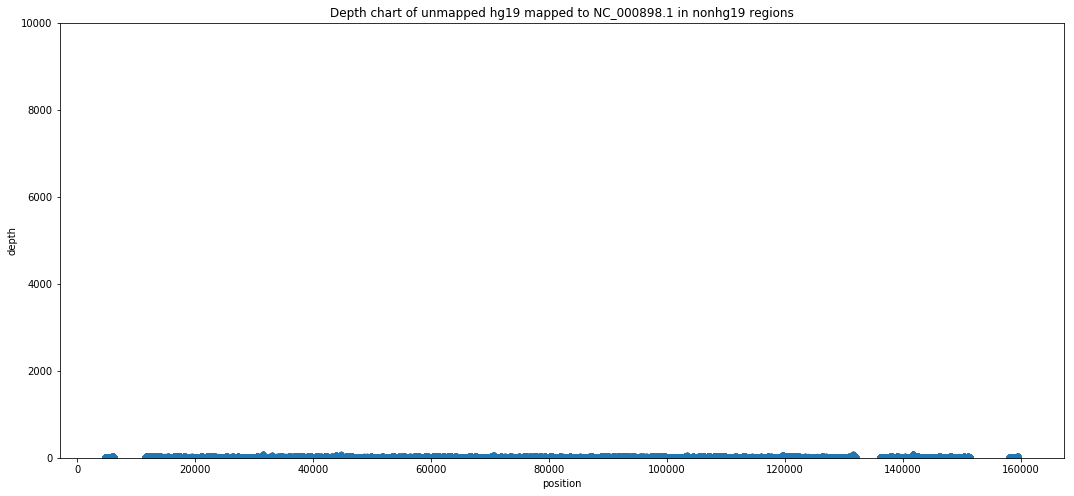

NC_001488.1
Human T-lymphotropic virus 2, complete proviral genome


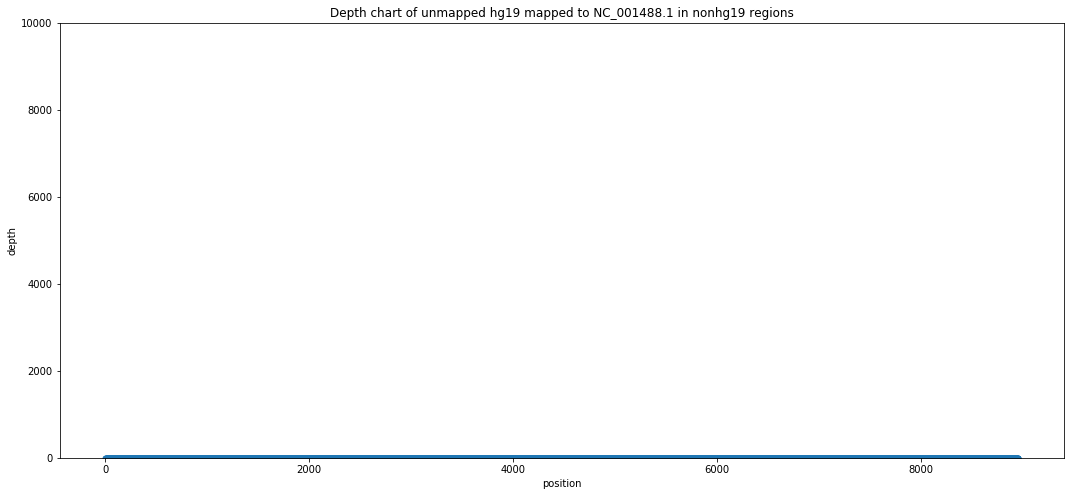

NC_001526.4
Human papillomavirus type 16, complete genome


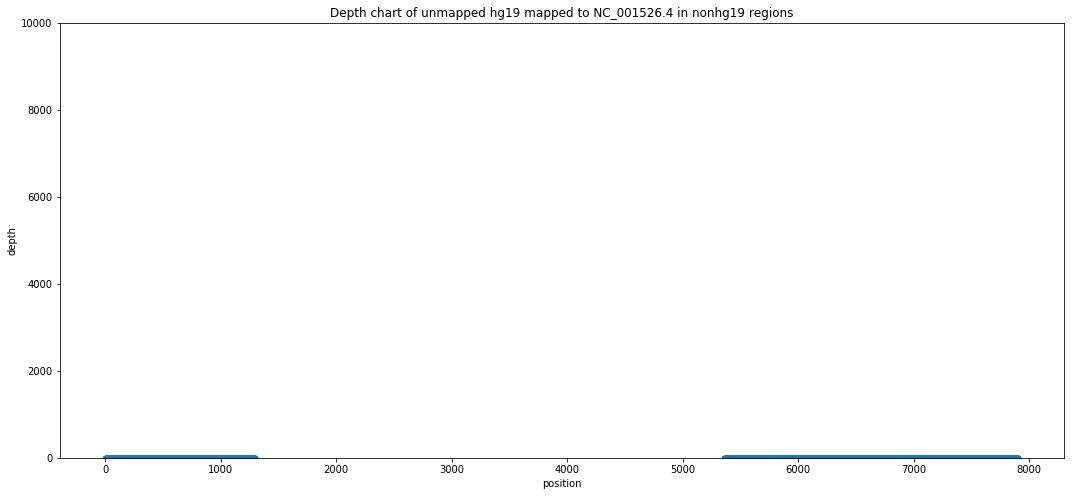

NC_001664.4
Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102


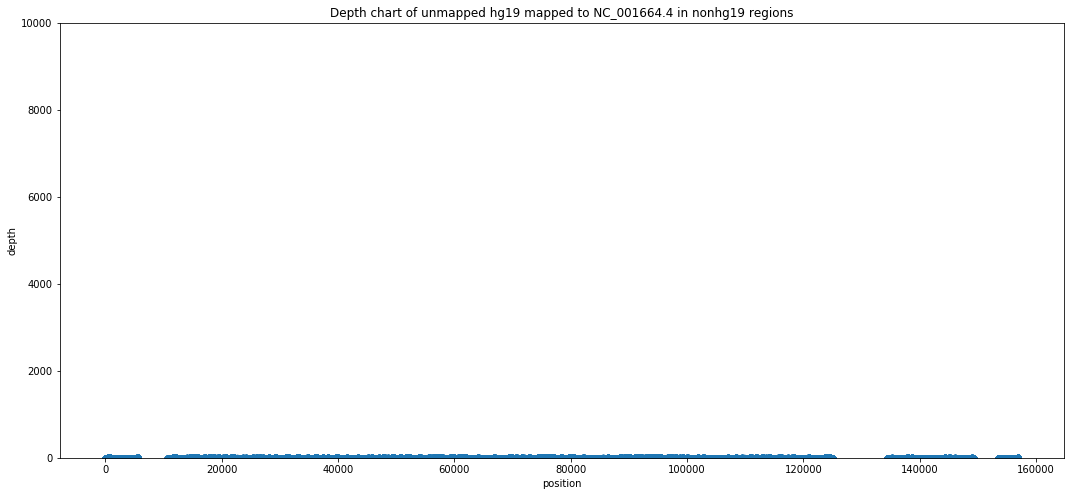

NC_001710.1
GB virus C/Hepatitis G virus, complete genome


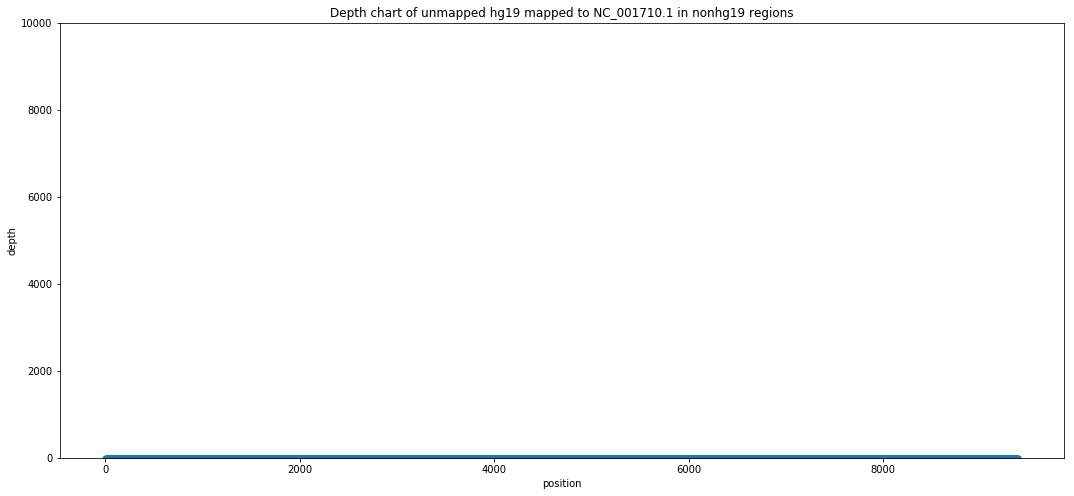

NC_001716.2
Human herpesvirus 7, complete genome


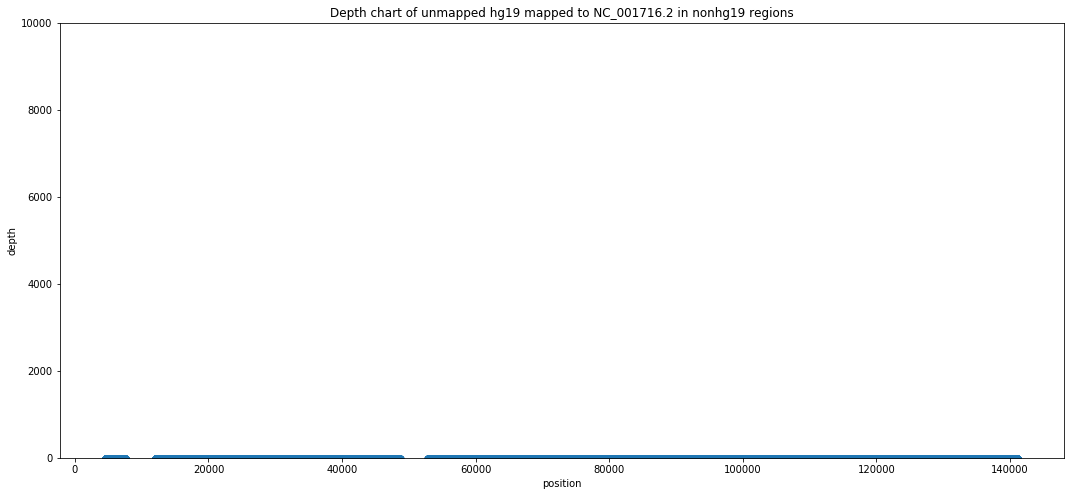

NC_003521.1
Panine herpesvirus 2 strain Heberling, complete genome


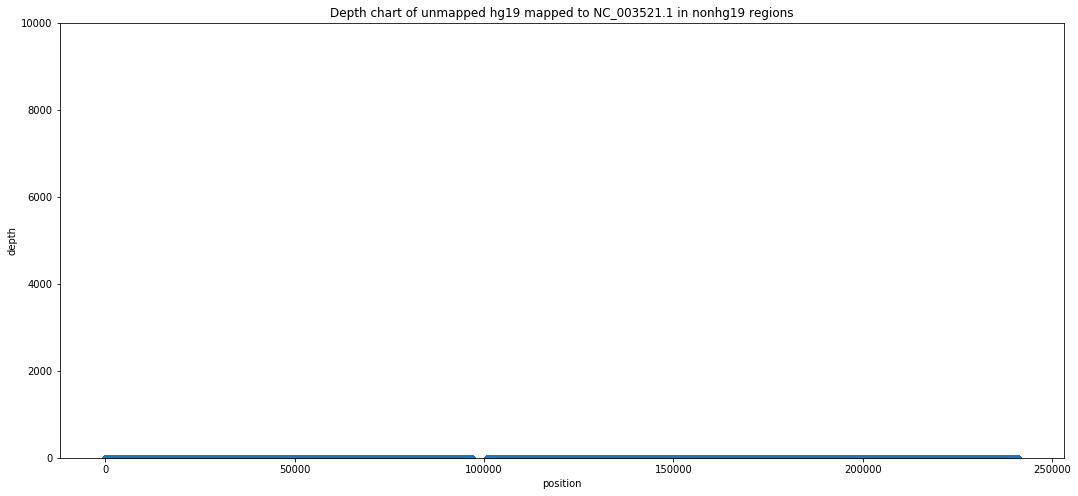

NC_006150.1
Macacine herpesvirus 3, complete genome


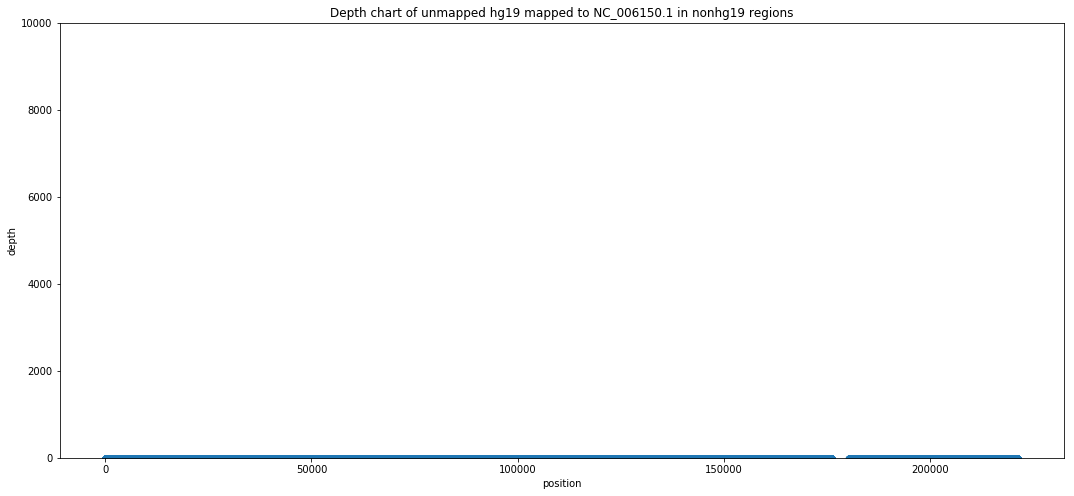

NC_006273.2
Human herpesvirus 5 strain Merlin, complete genome


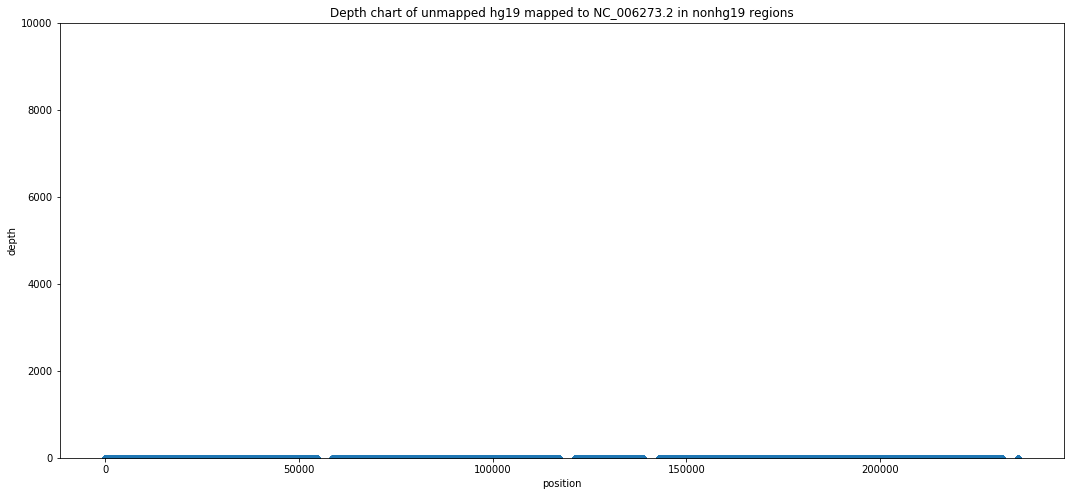

NC_007605.1
Human gammaherpesvirus 4, complete genome


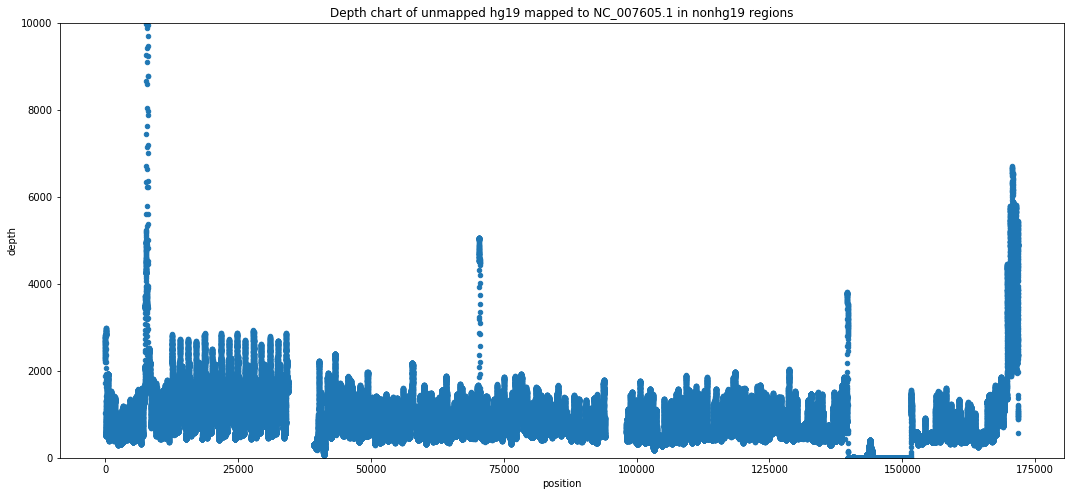

NC_008168.1
Choristoneura fumiferana granulovirus, complete genome


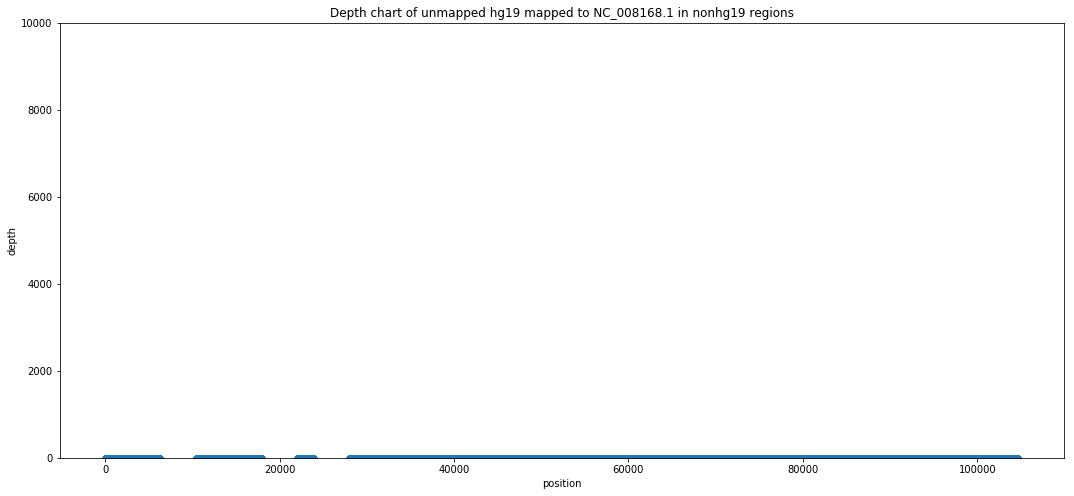

NC_009333.1
Human herpesvirus 8, complete genome


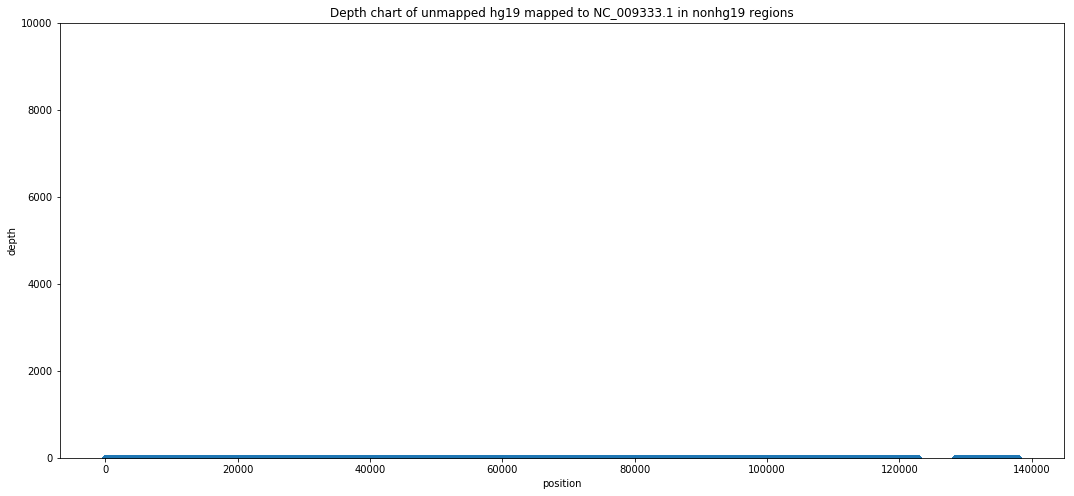

NC_009942.1
West Nile virus lineage 1, complete genome


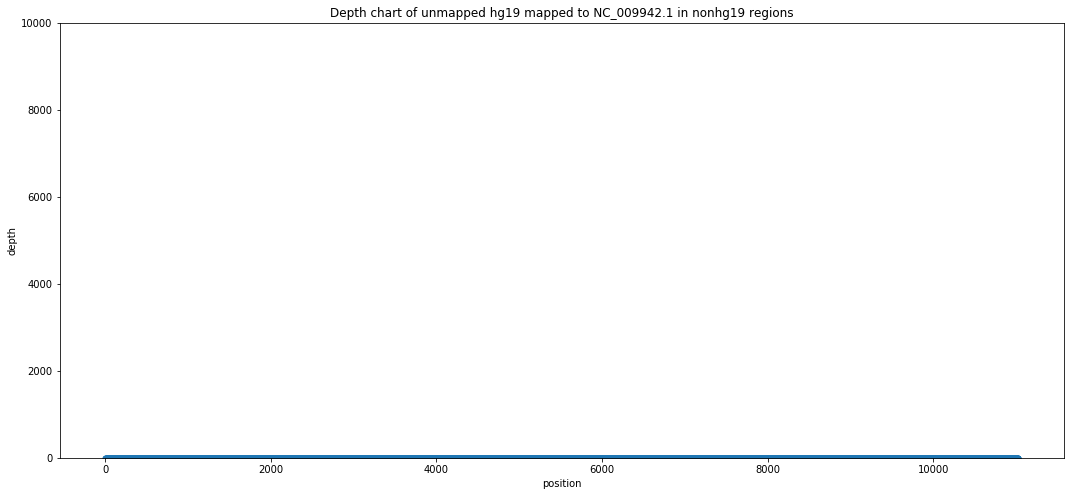

NC_011800.1
Human T-lymphotropic virus 4, complete genome


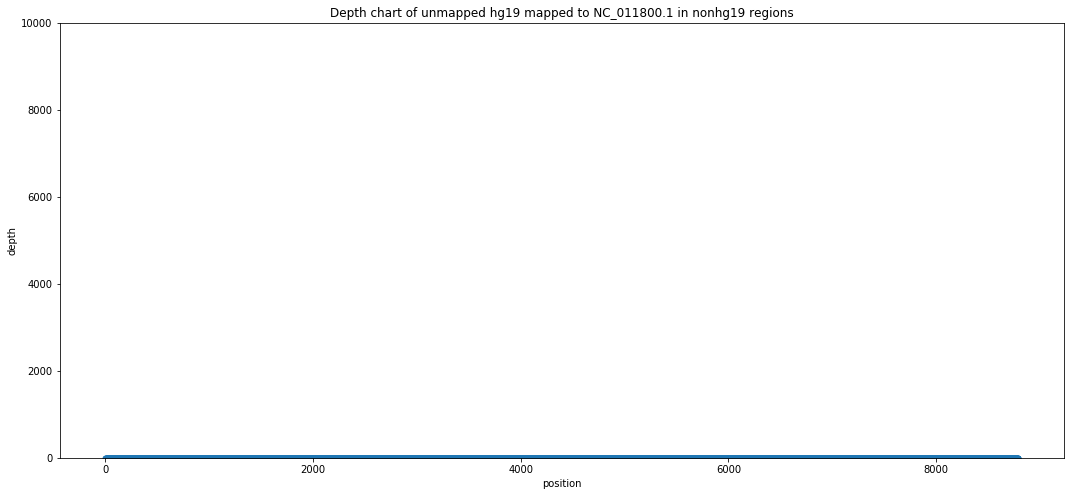

NC_012783.2
Cercopithecine herpesvirus 5 strain 2715, complete genome


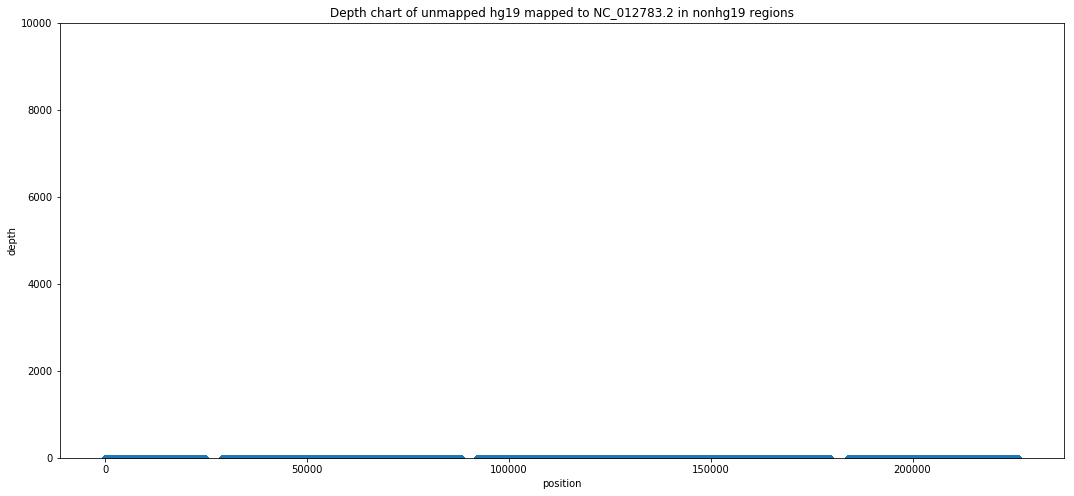

NC_014406.1
Human polyomavirus 6, complete genome


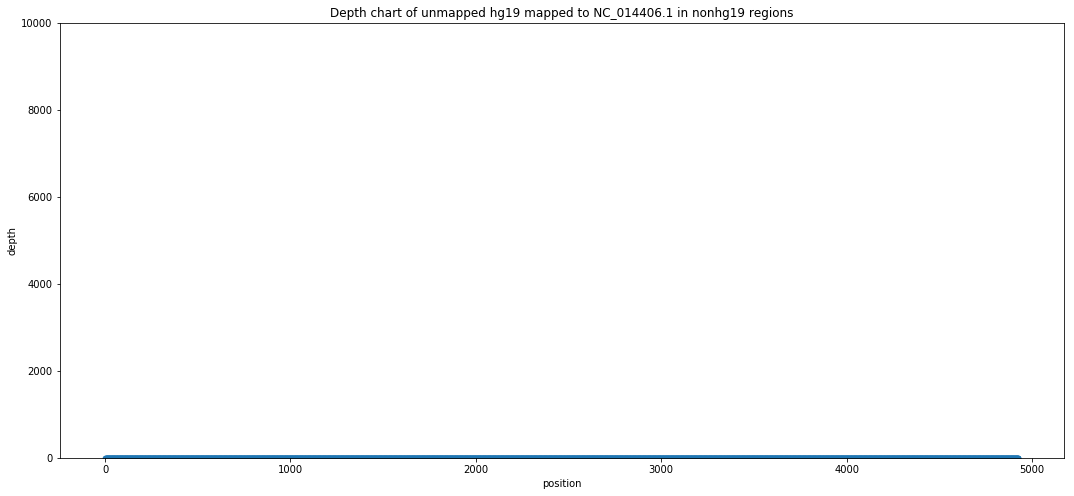

NC_014407.1
Human polyomavirus 7, complete genome


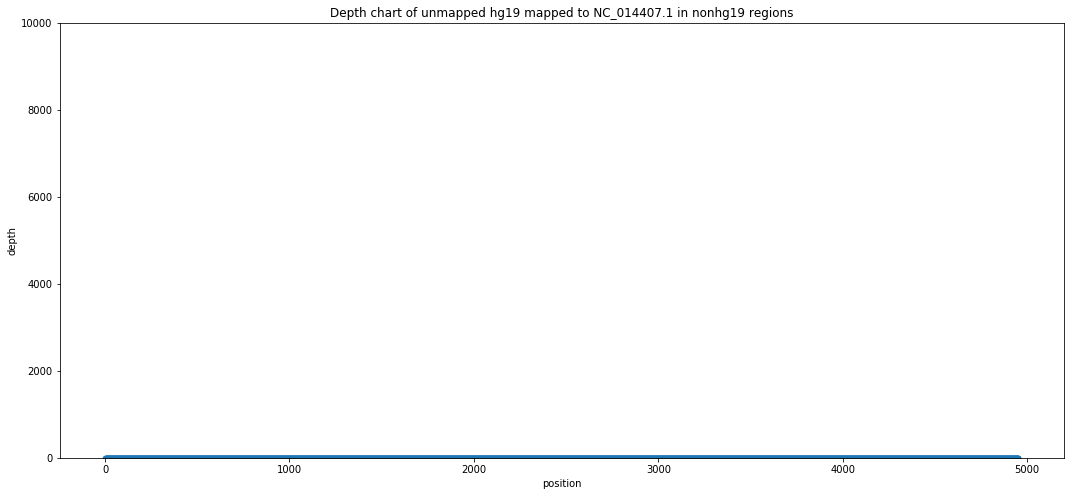

NC_015150.1
Human polyomavirus 9, complete genome


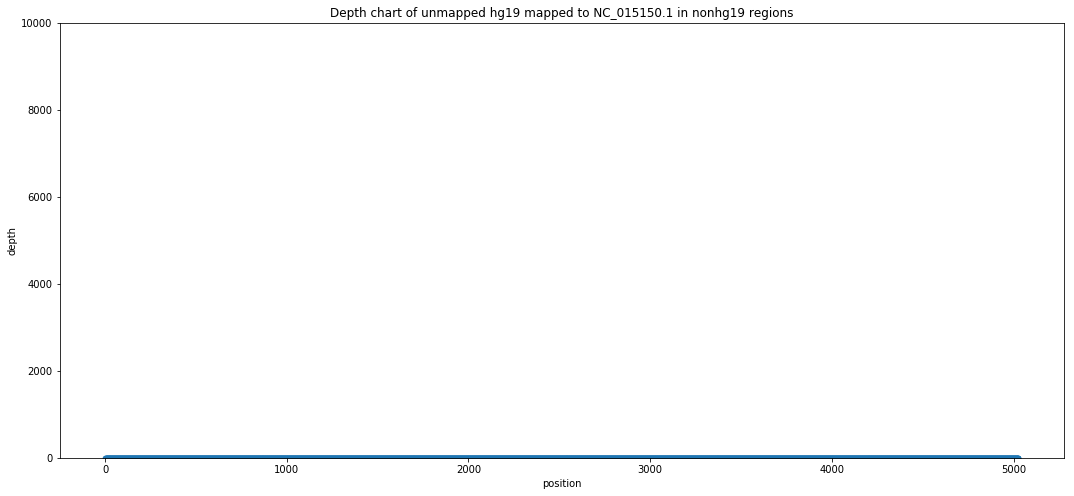

NC_016447.1
Aotine herpesvirus 1 strain S34E, complete genome


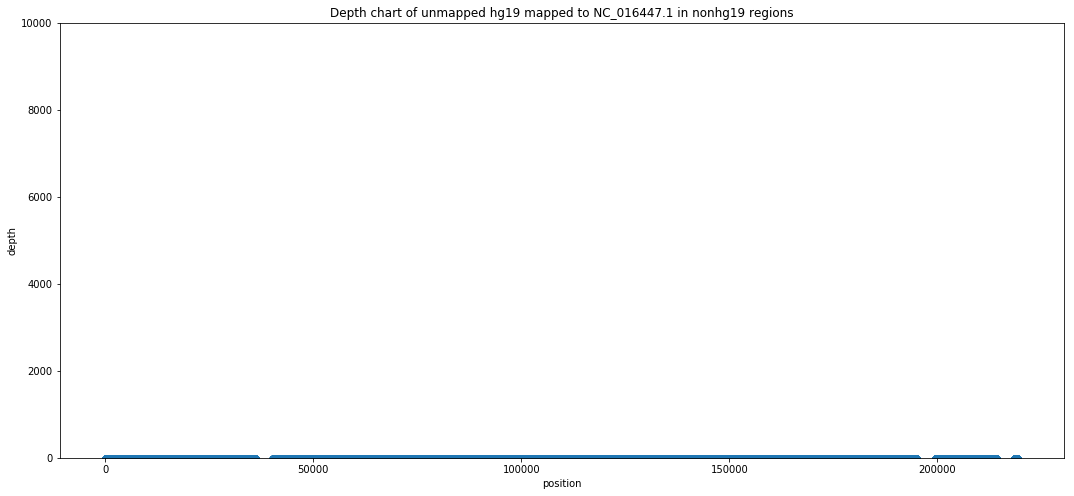

NC_016448.1
Saimiriine herpesvirus 4 strain SqSHV, complete genome


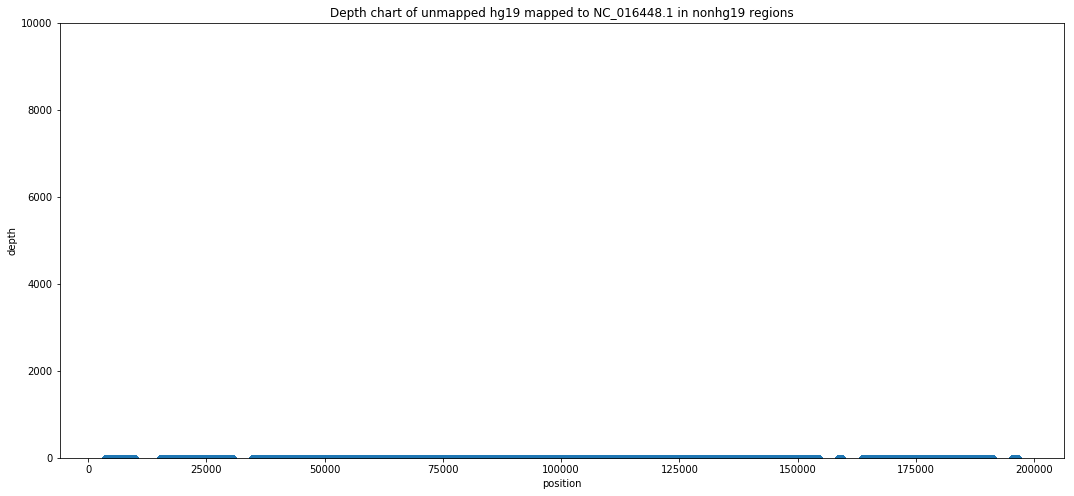

NC_017993.1
Human papillomavirus type 135, complete genome


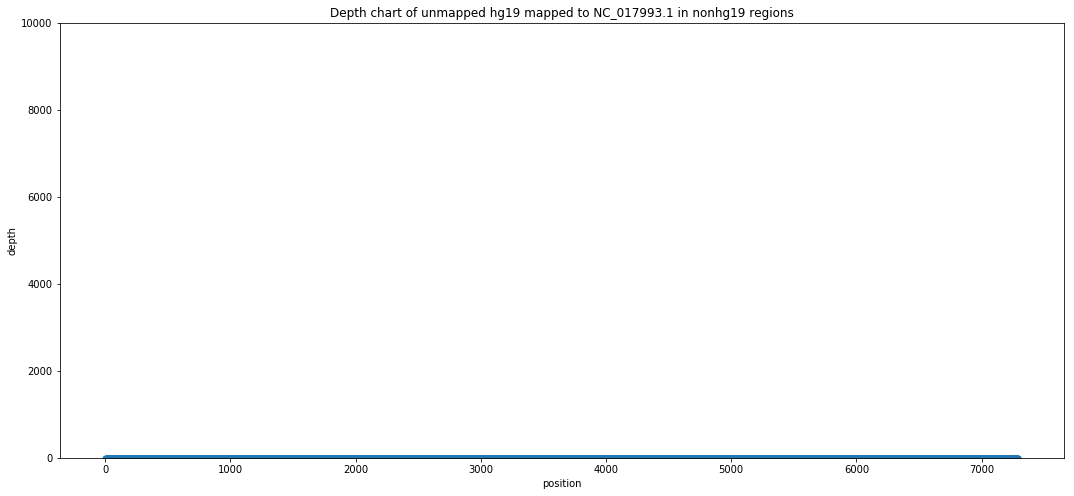

NC_017994.1
Human papillomavirus type 136, complete genome


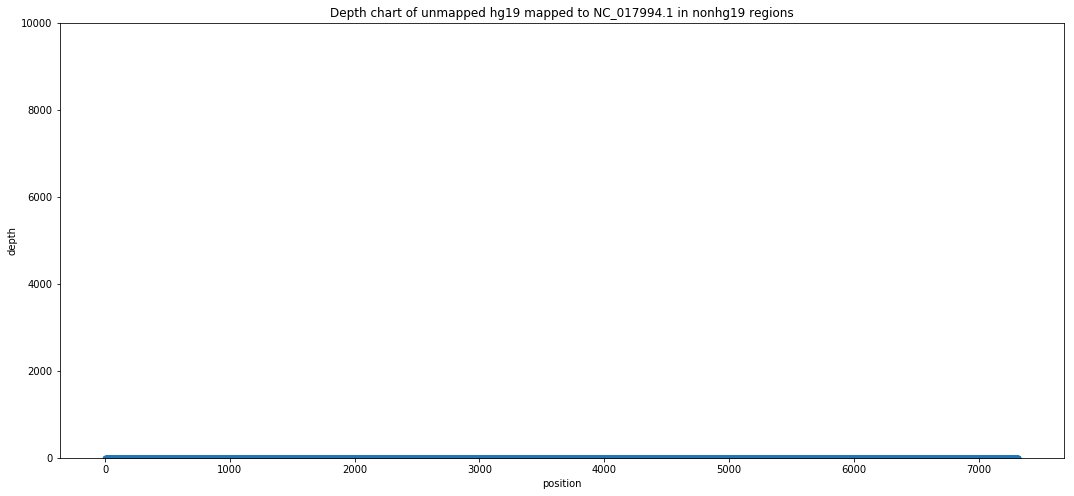

NC_017995.1
Human papillomavirus type 137, complete genome


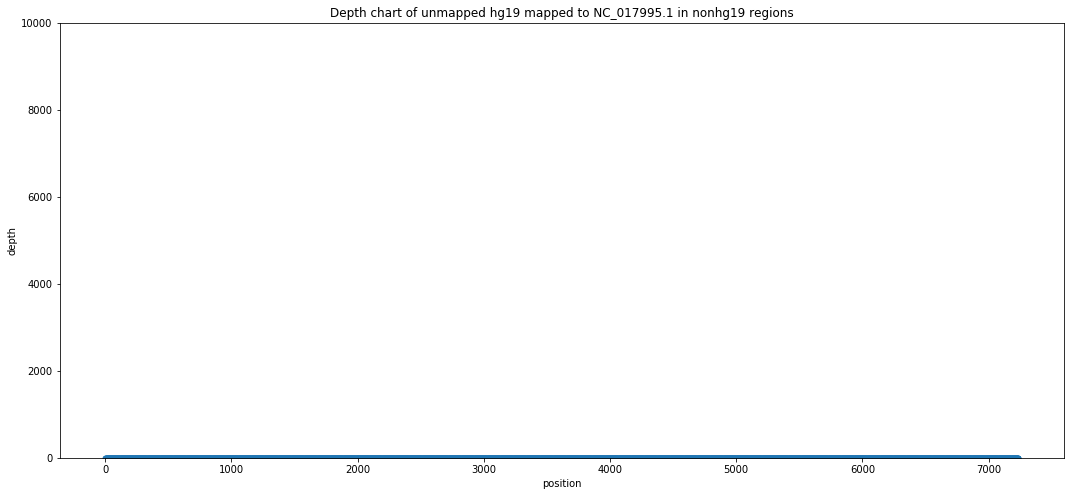

NC_017996.1
Human papillomavirus type 140, complete genome


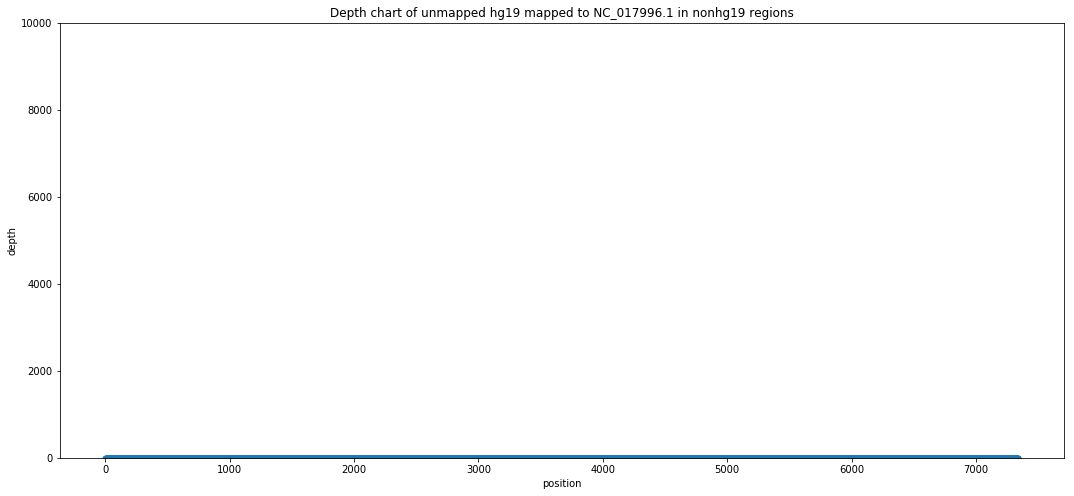

NC_017997.1
Human papillomavirus type 144, complete genome


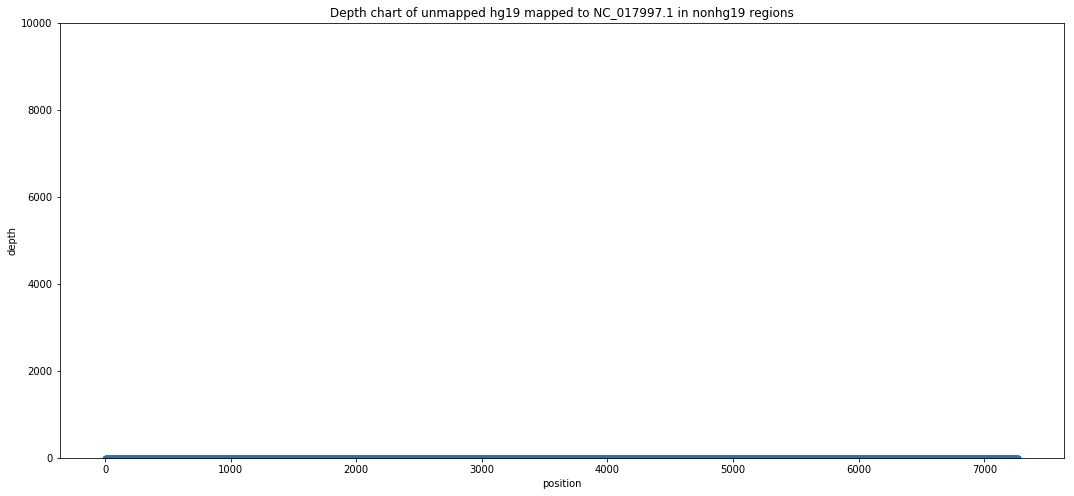

NC_020890.1
Human polyomavirus 12 strain hu1403, complete genome


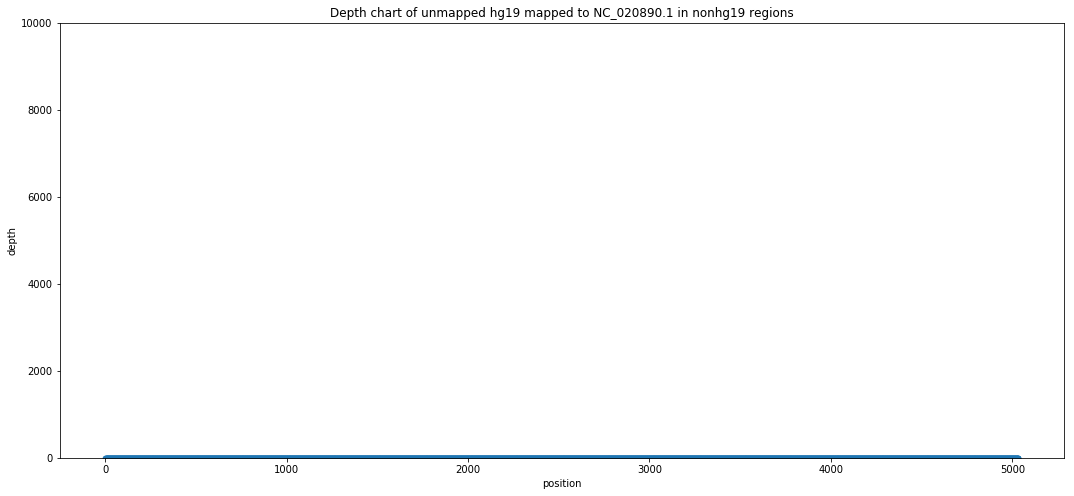

NC_027016.1
Papio ursinus cytomegalovirus isolate OCOM4-52, complete genome


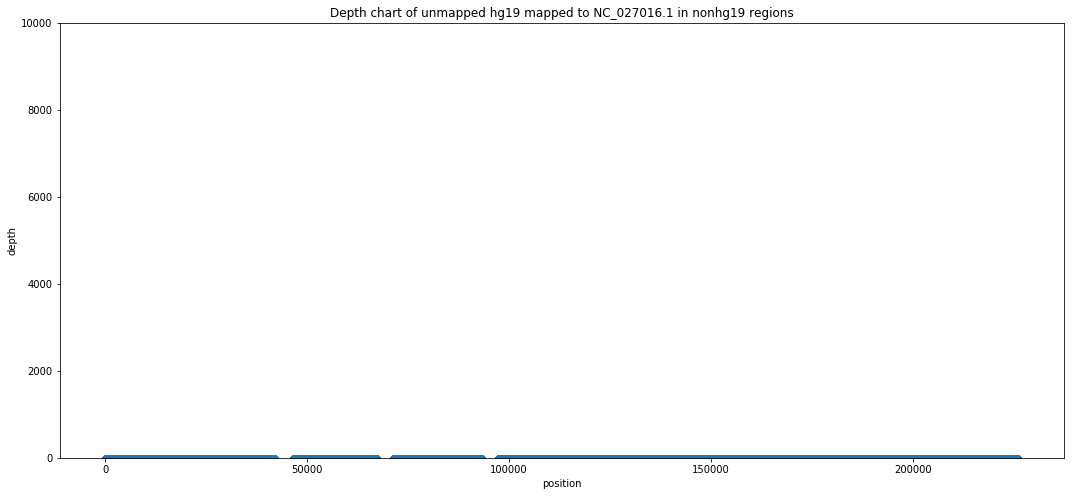

NC_031757.1
Polyomavirus sp. isolate poly-CA1, complete genome


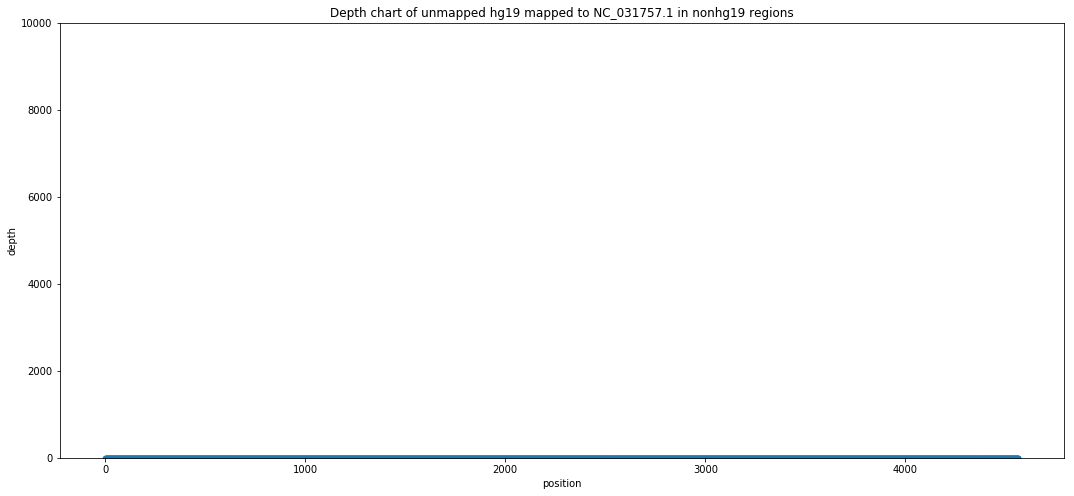

NC_033176.1
Cynomolgus cytomegalovirus isolate 31908, complete genome


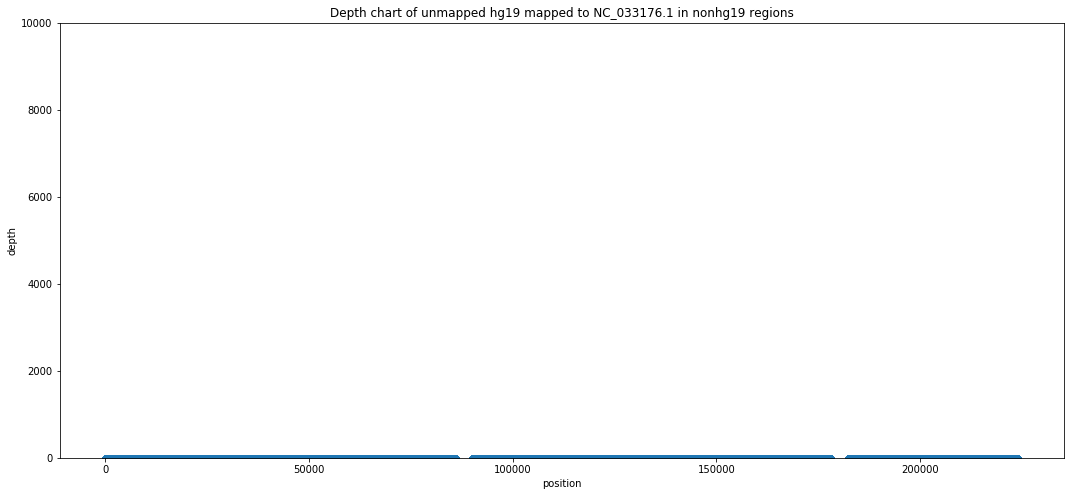

NC_035889.1
Zika virus isolate ZIKV/H. sapiens/Brazil/Natal/2015, complete genome


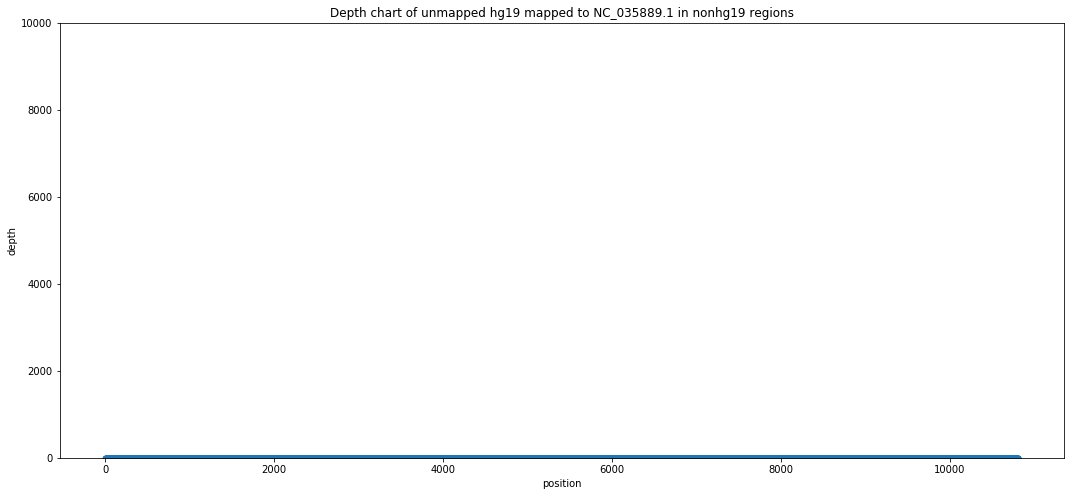

U43400.1
Human herpesvirus-7 (HHV7) JI, complete virion genome


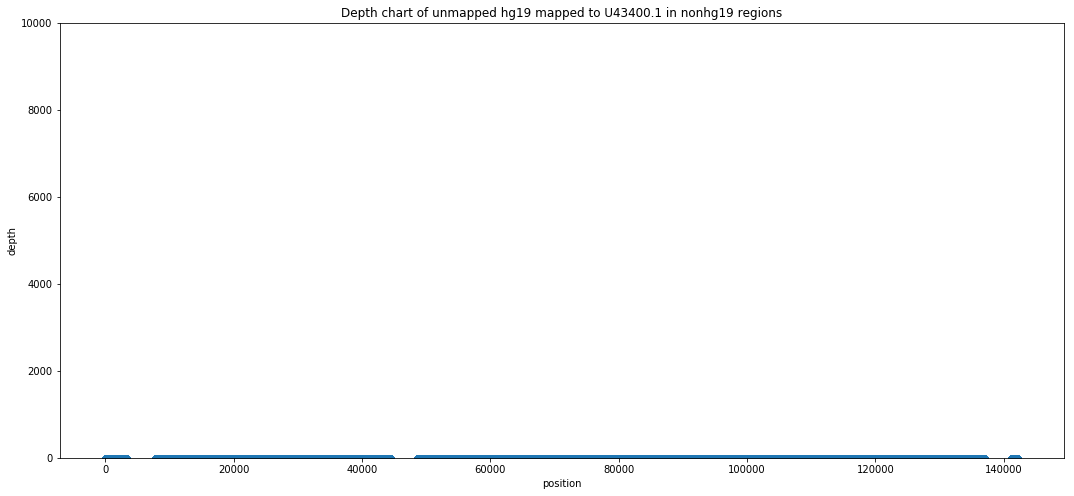

U46016.1
Human immunodeficiency virus type 1 subtype C complete proviral genome


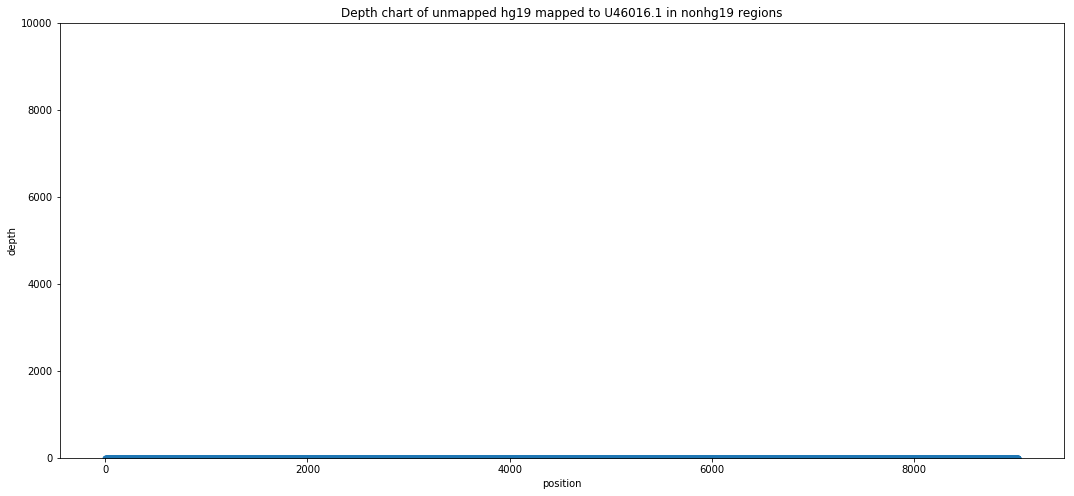

U54771.1
Human immunodeficiency virus type 1, strain CM240, complete proviral genome


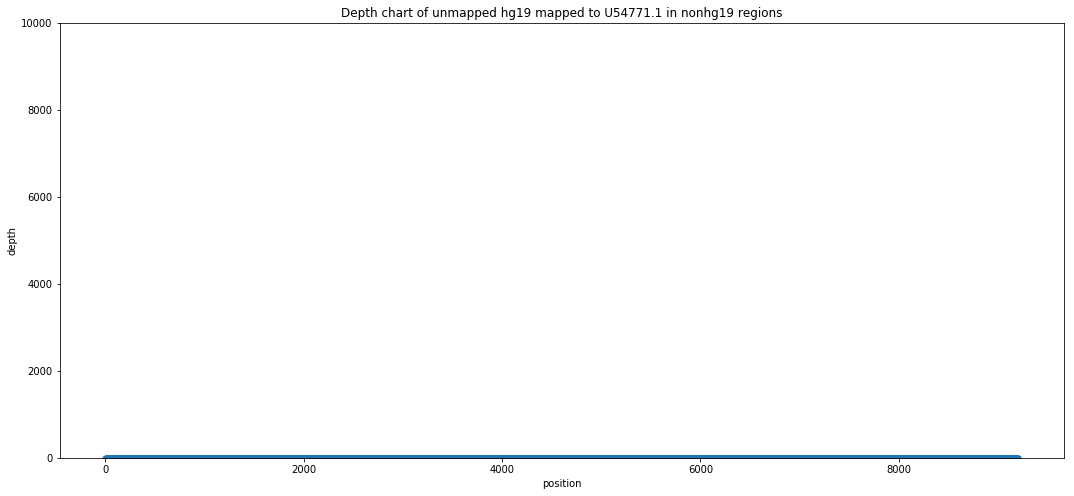

X14112.1
Human herpesvirus 1 complete genome


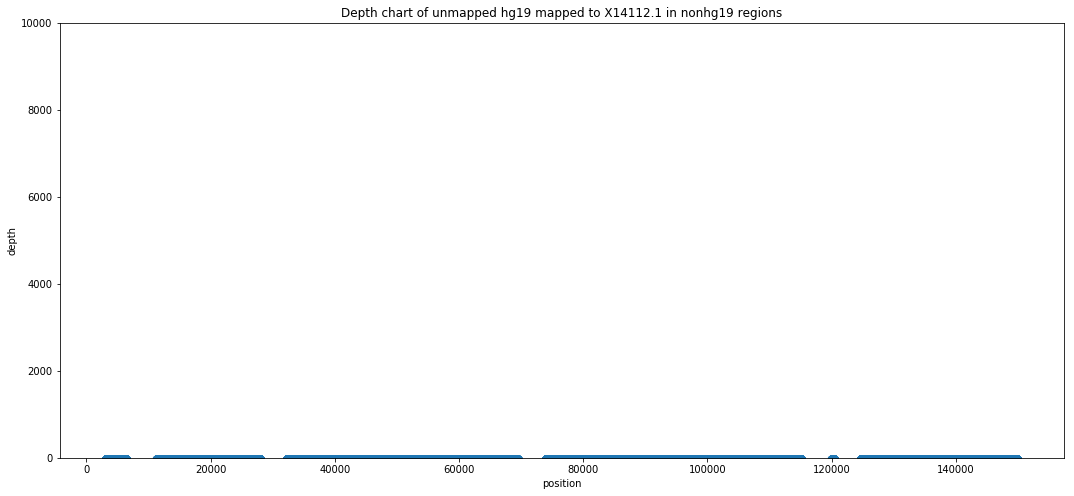

X17403.1
Human cytomegalovirus strain AD169 complete genome


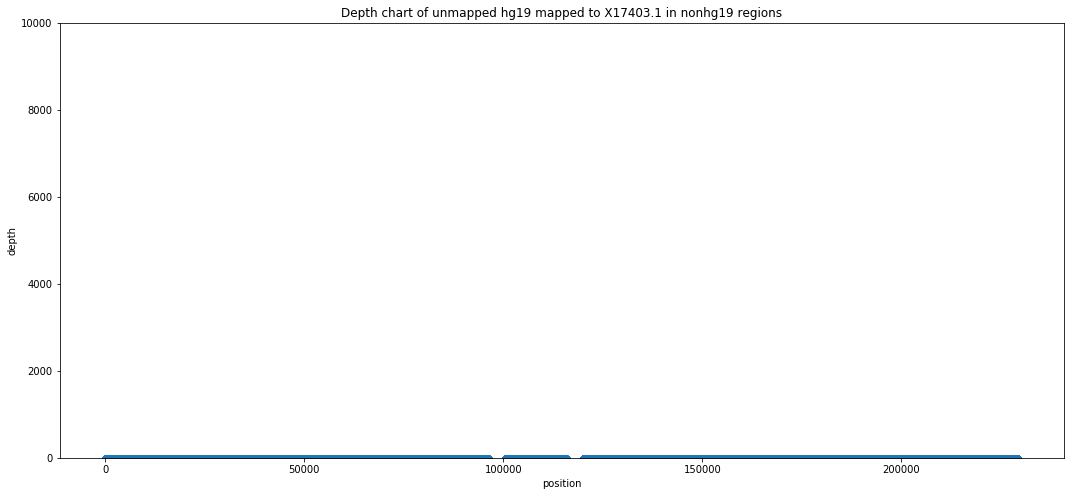

X75658.1
Human hepatitis virus (genotype F, Fou) preS1, preS2, S, C, X, antigens, core antigen, X protein and polymerase


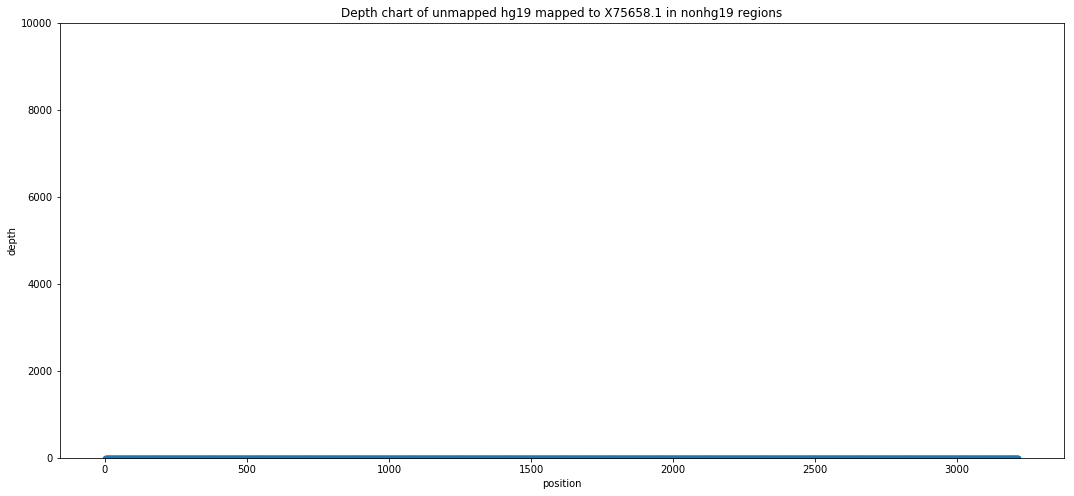

X83413.2
Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102


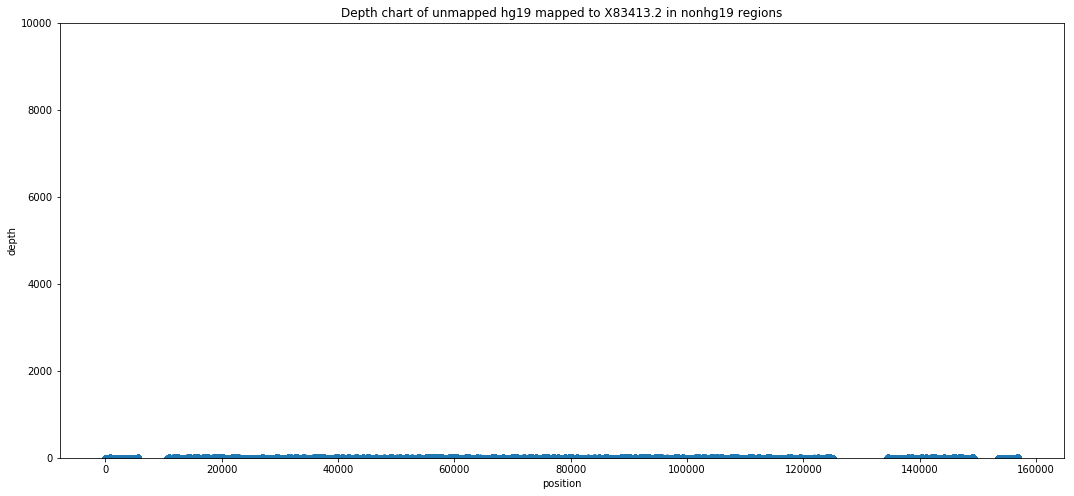

Z86099.2
Herpes simplex virus type 2 (strain HG52), complete genome


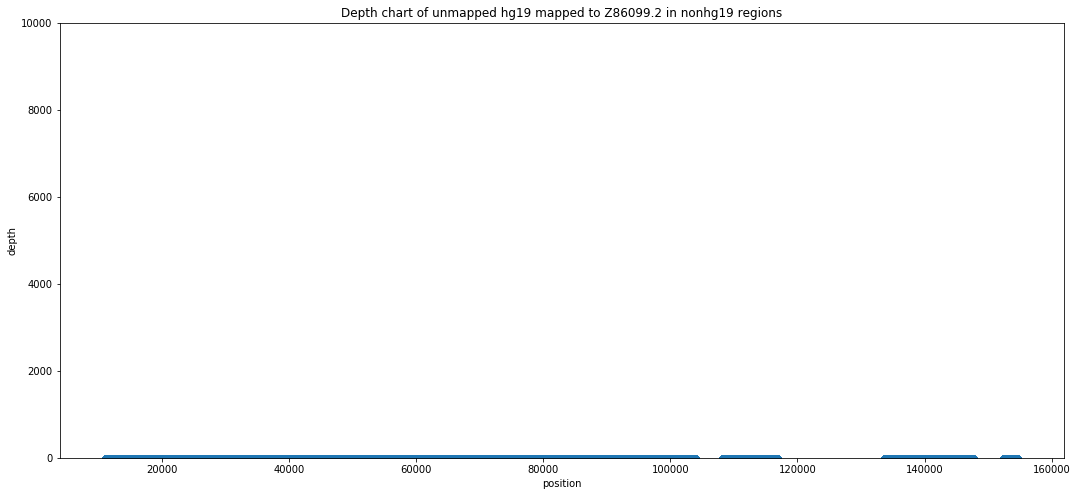

In [4]:
for accession, row in virii.iterrows():
    print(accession)
    print(row.description)
    filepath="/Users/jakewendt/20190130-1000genomes-unmapped-viruses/ALL."+accession+".nonhg19.depth.txt"
    d = pandas.read_csv(filepath,
        sep="\t",
        header=None,
        usecols=[1,2],
        names=["position","depth"],
        index_col="position")
    if len(d) > 0:
        d.fillna(0).reset_index().plot(
            title="Depth chart of unmapped hg19 mapped to "+accession+" in nonhg19 regions",
            logy=False,kind='scatter',x='position',y='depth',ylim=[1,10000])
        plt.show()
    

In [5]:
for filepath in sorted(glob.iglob('/Users/jakewendt/20190128-refs-hg19/*nonhg19.shrunk2000.txt')):
    virus=os.path.basename(filepath)
    virus = virus[:virus.index('.',virus.index('.')+1)]
    print(virus + " - " + virii.loc[virus].description)
    with open(filepath, 'r') as file:
        print(file.read())
        print()

AB513134.1 - Human T-lymphotropic virus 1 proviral DNA, complete genome, isolate: B1033-2009
AB513134.1:1-9034


AB618031.1 - Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome
AB618031.1:2063-26612 AB618031.1:30644-47262 AB618031.1:51318-67998 AB618031.1:72086-149643


AF037218.1 - Human herpesvirus 7 strain RK, complete genome
AF037218.1:4547-7612 AF037218.1:11961-48758 AF037218.1:52787-141249


AF148805.2 - Human herpesvirus 8 strain GK18, complete genome
AF148805.2:1-122881 AF148805.2:128395-137969


AP015015.1 - Human herpesvirus 4 DNA, complete genome, strain: SNU-719
AP015015.1:1-31596 AP015015.1:36487-91515 AP015015.1:95548-169425


AP015016.1 - Human herpesvirus 4 DNA, complete genome, strain: YCCEL1
AP015016.1:1-36133 AP015016.1:41033-96436 AP015016.1:100469-177320


AP017458.1 - Human herpesvirus 8 DNA, complete genome, strain: SPEL
AP017458.1:1-123130 AP017458.1:128387-135558


AY352275.1 - HIV-1 isolate SF33 from USA, complete genome
AY352275.1:1-7714




In [6]:
import datetime
print(str(datetime.datetime.now()))

2019-01-31 15:26:31.263731
